# Importer les modules <a class="anchor" id="chapter1"></a>

In [1]:
import PAD_02_module as MyMod

import numpy as np
import pandas as pd 

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import figure
from matplotlib.patches import Rectangle
import seaborn as sns

import gc 

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn import pipeline
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import utils
from sklearn.utils import shuffle

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from pycaret.classification import *

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

In [2]:
print("Version de pycaret: {}".format(pycaret.__version__))

Version de pycaret: 2.3.5


# Lire les fichiers de données  <a class="anchor" id="chapter2"></a>

In [3]:
# List files available
print(os.listdir("../input/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [4]:
app_train = pd.read_csv('../input/application_train.csv')
app_test = pd.read_csv('../input/application_test.csv')
bureau = pd.read_csv('../input/bureau.csv')
bureau_balance = pd.read_csv('../input/bureau_balance.csv')
previous = pd.read_csv('../input/previous_application.csv')
installments = pd.read_csv('../input/installments_payments.csv')
cash = pd.read_csv('../input/POS_CASH_balance.csv')
credit = pd.read_csv('../input/credit_card_balance.csv')
sample = pd.read_csv('../input/sample_submission.csv')
description = pd.read_csv('../input/HomeCredit_columns_description.csv', encoding_errors = 'ignore')

In [5]:
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

The test set is considerably smaller and lacks a `TARGET` column. 

In [7]:
print('Bureau data shape: ', bureau.shape)
bureau.head()

Bureau data shape:  (1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [8]:
print('Bureau_Balance data shape: ', bureau_balance.shape)
bureau_balance.head()

Bureau_Balance data shape:  (27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [9]:
print('Previous data shape: ', previous.shape)
previous.head()

Previous data shape:  (1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [10]:
print('Installments data shape: ', installments.shape)
installments.head()

Installments data shape:  (13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [11]:
print('Cash data shape: ', cash.shape)
cash.head()

Cash data shape:  (10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [12]:
print('Credit data shape: ', credit.shape)
credit.head()

Credit data shape:  (3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [13]:
print('Sample data shape: ', sample.shape)
sample.head()

Sample data shape:  (48744, 2)


SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [14]:
print('Description data shape: ', description.shape)
description.head()

Description data shape:  (219, 5)


Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

# Analyser et explorer les données  <a class="anchor" id="chapter3"></a>

## Examiner la distribution de TARGET  (variable à prédire)    <a class="anchor" id="sub3_1"></a>
 > 0 > pas de difficultés de paiement  
1 > Difficultés de paiement  

In [15]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

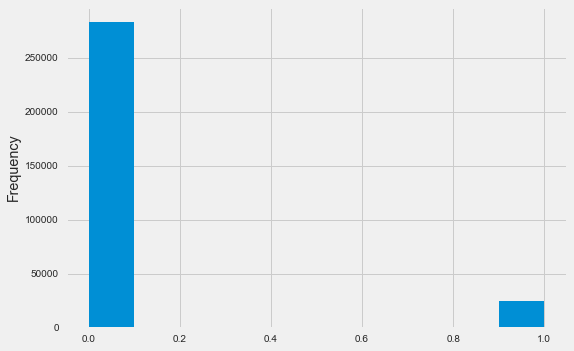

In [16]:
app_train['TARGET'].astype(int).plot.hist();

 > Jeu de données très déséquilibré: Beaucoup de prêts avec des difficultés de paiement  
Sujet à prendre en compte avant la phase d'apprentissage sur le jeu d'entraînement

## Examiner les valeurs manquantes en nombre et en pourcentage <a class="anchor" id="sub3_2"></a>

In [17]:
missing_values = MyMod.missing_values_table(app_train)
missing_values.head()

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4

In [18]:
missing_values = MyMod.missing_values_table(app_test)
missing_values.head()

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MODE                    33495               68.7
COMMONAREA_MEDI                    33495               68.7
COMMONAREA_AVG                     33495               68.7
NONLIVINGAPARTMENTS_MEDI           33347               68.4
NONLIVINGAPARTMENTS_AVG            33347               68.4

In [19]:
missing_values = MyMod.missing_values_table(bureau)
missing_values.head()

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
AMT_ANNUITY                    1226791               71.5
AMT_CREDIT_MAX_OVERDUE         1124488               65.5
DAYS_ENDDATE_FACT               633653               36.9
AMT_CREDIT_SUM_LIMIT            591780               34.5
AMT_CREDIT_SUM_DEBT             257669               15.0

In [20]:
missing_values = MyMod.missing_values_table(bureau_balance)
missing_values.head()

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [21]:
missing_values = MyMod.missing_values_table(previous)
missing_values.head()

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


Missing Values  % of Total Values
RATE_INTEREST_PRIMARY            1664263               99.6
RATE_INTEREST_PRIVILEGED         1664263               99.6
AMT_DOWN_PAYMENT                  895844               53.6
RATE_DOWN_PAYMENT                 895844               53.6
NAME_TYPE_SUITE                   820405               49.1

In [22]:
missing_values = MyMod.missing_values_table(installments)
missing_values.head()

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
DAYS_ENTRY_PAYMENT            2905                0.0
AMT_PAYMENT                   2905                0.0

In [23]:
missing_values = MyMod.missing_values_table(cash)
missing_values.head()

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
CNT_INSTALMENT_FUTURE           26087                0.3
CNT_INSTALMENT                  26071                0.3

In [24]:
missing_values = MyMod.missing_values_table(credit)
missing_values.head()

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


Missing Values  % of Total Values
AMT_PAYMENT_CURRENT                 767988               20.0
AMT_DRAWINGS_ATM_CURRENT            749816               19.5
AMT_DRAWINGS_OTHER_CURRENT          749816               19.5
AMT_DRAWINGS_POS_CURRENT            749816               19.5
CNT_DRAWINGS_ATM_CURRENT            749816               19.5

 > Choix de conserver toutes les colonnes pour le moment  
 Ultérieurement il faudra choisir de supprimer les variables ayant un pourcentage important de valeurs manquantes ou de les compléter par imputation

## Examiner les types de variables  <a class="anchor" id="sub3_3"></a>
variables numériques (entiers, flottants)   
variables catégorielles (objets)

In [25]:
# Nombre de variables pour chaque type
print(app_train.dtypes.value_counts())
# Nombre de classes de chaque variables catégorielles
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

float64    65
int64      41
object     16
dtype: int64


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [26]:
print(app_test.dtypes.value_counts())
app_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

float64    65
int64      40
object     16
dtype: int64


NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [27]:
print(bureau.dtypes.value_counts())
bureau.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

float64    8
int64      6
object     3
dtype: int64


CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

In [28]:
print(bureau_balance.dtypes.value_counts())
bureau_balance.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

int64     2
object    1
dtype: int64


STATUS    8
dtype: int64

In [29]:
print(previous.dtypes.value_counts())
previous.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

object     16
float64    15
int64       6
dtype: int64


NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [30]:
print(installments.dtypes.value_counts())

float64    5
int64      3
dtype: int64


In [31]:
print(cash.dtypes.value_counts())
cash.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

int64      5
float64    2
object     1
dtype: int64


NAME_CONTRACT_STATUS    9
dtype: int64

In [32]:
print(credit.dtypes.value_counts())
credit.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

float64    15
int64       7
object      1
dtype: int64


NAME_CONTRACT_STATUS    7
dtype: int64

## Encoder les variables catégorielles <a class="anchor" id="sub3_4"></a>

### Harmoniser les types

In [33]:
app_train = MyMod.convert_types(app_train, print_info = False)
app_test = MyMod.convert_types(app_test, print_info = False)
bureau = MyMod.convert_types(bureau, print_info = False)
bureau_balance = MyMod.convert_types(bureau_balance, print_info = False)
previous = MyMod.convert_types(previous, print_info = False)
cash = MyMod.convert_types(cash, print_info=True)
credit = MyMod.convert_types(credit, print_info=True)
installments = MyMod.convert_types(installments, print_info=True)

Original Memory Usage: 0.64 gb.
New Memory Usage: 0.41 gb.
Original Memory Usage: 0.71 gb.
New Memory Usage: 0.42 gb.
Original Memory Usage: 0.87 gb.
New Memory Usage: 0.49 gb.


### Label encoding jusqu'à 2 modalités, One-Hot Encoding au delà
get_dummies retourne le type uint8

In [34]:
nb_modal = 2
print('app_train')
app_train = MyMod.special_encoding(app_train, nb_modal)
print('app_test')
app_test = MyMod.special_encoding(app_test, nb_modal)

app_train
   3 columns were label encoded.
Features shape:  (307511, 243)
app_test
   4 columns were label encoded.
Features shape:  (48744, 238)


### Aligner les dataframes de test et de train
Nécessaire suite au one-hot encodage des variables catégorielles

In [35]:
target = app_train['TARGET']  #boolean

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = target

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 238)
Testing Features shape:  (48744, 237)


## Rechercher les anomalies <a class="anchor" id="sub3_5"></a>

In [36]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

 > Age du client: ok

In [37]:
(app_train['DAYS_EMPLOYED'] / 365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

> Ancienneté sur emploi actuel: valeur max positive et ~1000 ans

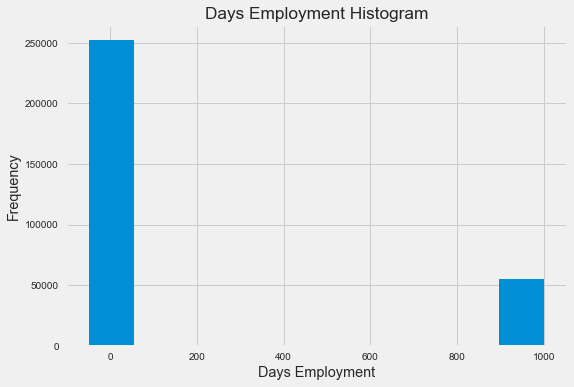

In [38]:
(app_train['DAYS_EMPLOYED'] / 365).plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [39]:
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))

anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


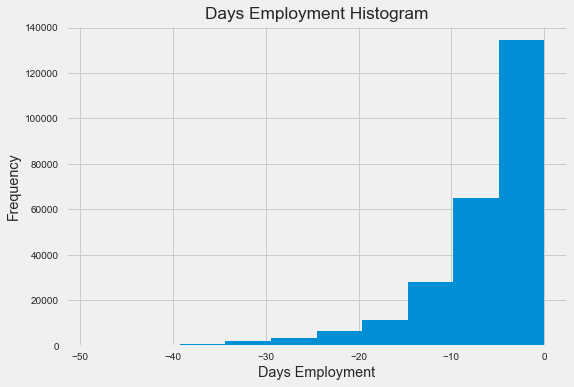

In [40]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

(app_train['DAYS_EMPLOYED']/365).plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

 > La distribution devient correcte  
 Nouvelle variable DAYS_EMPLOYED_ANOM

In [41]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Examiner les corrélations entre les features et TARGET  <a class="anchor" id="sub3_6"></a>
Coefficient de corrélation de Pearson
* .00-.19 “very weak”
*  .20-.39 “weak”
*  .40-.59 “moderate”
*  .60-.79 “strong”
* .80-1.0 “very strong”

In [42]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

### Effet de l'age sur le risque de défaut

In [43]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

 > Plus le client est jeune, plus il risque de faire défaut (rappel: 0 pas défaut, 1 défaut)

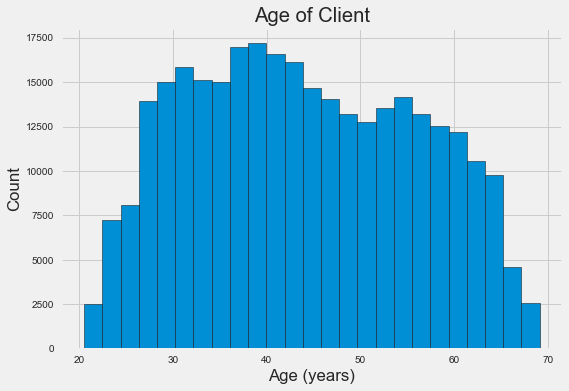

In [44]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

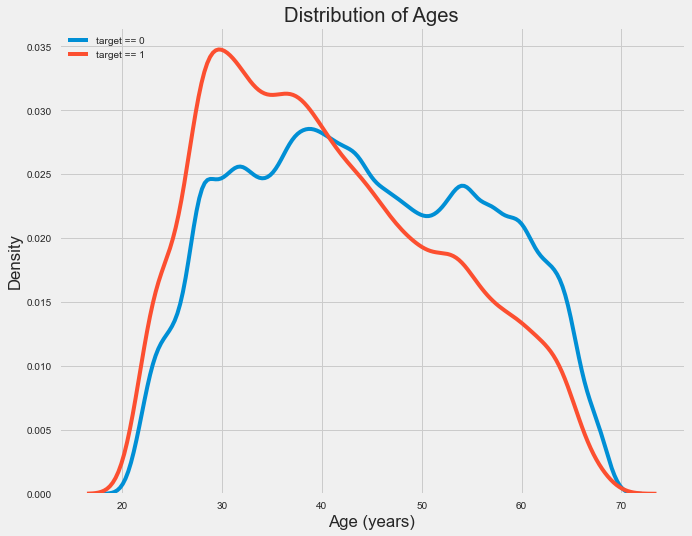

In [45]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend(loc="upper left")

 > En rouge, defaut (TARGET = 1) est déformée vers la gauche  
 Regardons le taux de défaut par tranches d'âge

In [46]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0    True        9461    25.920548  (25.0, 30.0]
1   False       16765    45.931507  (45.0, 50.0]
2   False       19046    52.180822  (50.0, 55.0]
3   False       19005    52.068493  (50.0, 55.0]
4   False       19932    54.608219  (50.0, 55.0]
5   False       16941    46.413699  (45.0, 50.0]
6   False       13778    37.747945  (35.0, 40.0]
7   False       18850    51.643836  (50.0, 55.0]
8   False       20099    55.065753  (55.0, 60.0]
9   False       14469    39.641096  (35.0, 40.0]

In [47]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

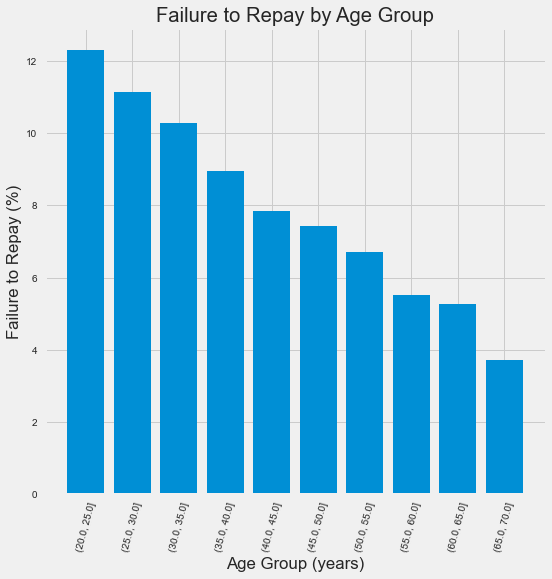

In [48]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

 > plus de 10% de risque de défaut si moins de 35 ans  
 moins de 5% si plus de 65 ans

### Exterior Sources  
Normalized score from external data source

In [49]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

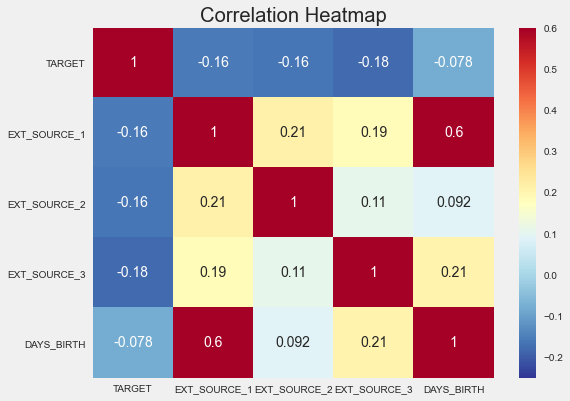

In [50]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

 > Corrélations négatives: plus le score externe est élevé moins il y a risque de défaut

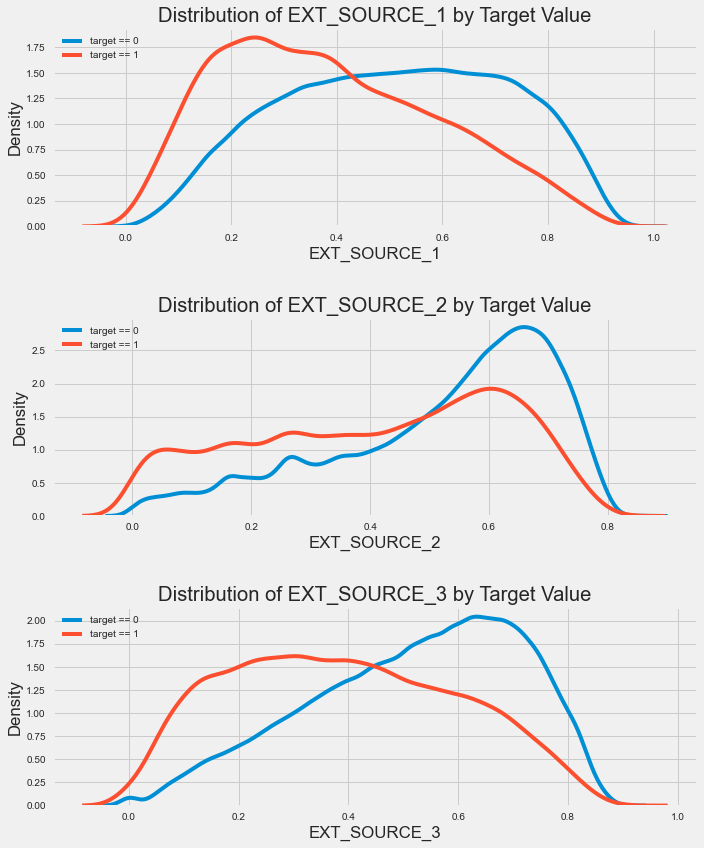

In [51]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density'); plt.legend(loc="upper left")
    
plt.tight_layout(h_pad = 2.5)   

 > EXT_SOURCE_1, EXT_SOURCE_3 sont discriminantes: plus elles sont faibles plus le risque de défaut est élevé    
 EXT_SOURCE_2 n'est pas discriminante

# Feature Engineering <a class="anchor" id="chapter4"></a> 

In [52]:
original_features = list(app_train.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  239


## Domain Knowledge Features <a class="anchor" id="sub4_1"></a> 

In [53]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']

In [54]:
app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']

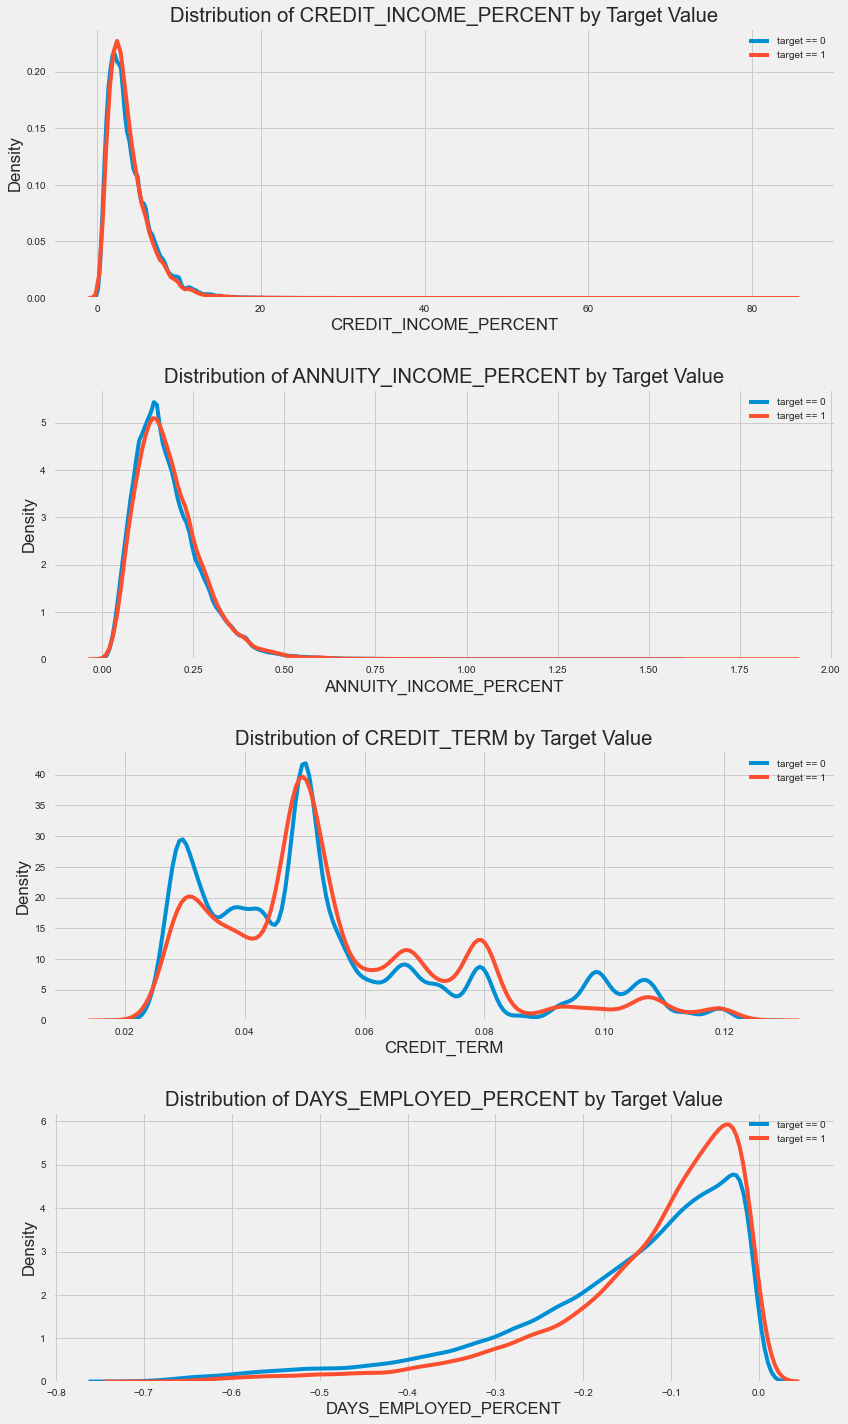

In [55]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density'); plt.legend(loc="upper right")
    
plt.tight_layout(h_pad = 2.5)

In [56]:
# Print out the new shapes
print('Training data with domain features shape: ', app_train.shape)
print('Testing data with domain features shape:  ', app_test.shape)

Training data with domain features shape:  (307511, 243)
Testing data with domain features shape:   (48744, 242)


## Polynomial Features <a class="anchor" id="sub4_2"></a> 

In [57]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Sauvegarder Target dans target et Supprimer Target dans poly_features
target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)
                               
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [58]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

Polynomial Features shape:  (307511, 35)


['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [59]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']

# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']

# Add in the target
poly_features['TARGET'] = target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
SK_ID_CURR     -0.002108
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [60]:
# Print out the new shapes
print('Training data with domain and polynomial features shape: ', app_train.shape)
print('Testing data with domain and polynomial features shape:  ', app_test.shape)

Training data with domain and polynomial features shape:  (307511, 243)
Testing data with domain and polynomial features shape:   (48744, 242)


In [61]:
poly_features = poly_features.drop(columns = ['TARGET'])

# Merge polynomial features
app_train = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Print out the new shapes
print('Training data with domain and polynomial features shape: ', app_train.shape)
print('Testing data with domain and polynomial features shape:  ', app_test.shape)

Training data with domain and polynomial features shape:  (307511, 278)
Testing data with domain and polynomial features shape:   (48744, 277)


## bureau <a class="anchor" id="sub4_3"></a> 

In [62]:
bureau_counts = MyMod.agg_categorical(bureau, parent_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

bureau_CREDIT_TYPE_Mobile operator loan_mean  \
SK_ID_CURR                                                 
100001                                               0.0   
100002                                               0.0   
100003                                               0.0   
100004                                               0.0   
100005                                               0.0   

            bureau_CREDIT_TYPE_Mobile operator loan_sum  \
SK_ID_CURR                                                
100001                                                0   
100002                                                0   
100003                                                0   
100004                                                0   
100005                                                0   

            bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean  \
SK_ID_CURR                                                                         
100001                                                    0.0                      
100002                                                    0.0                      
100003                                                    0.0                      
100004                                                    0.0                      
100005                                                    0.0                      

            bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum  \
SK_ID_CURR                                                                        
100001                                                      0                     
100002                                                      0                     
100003                                                      0                     
100004                                                      0                     
100005                                                      0                     

            bureau_CREDIT_ACTIVE_Bad debt_mean  \
SK_ID_CURR                                       
100001                                     0.0   
100002                                     0.0   
100003                                     0.0   
100004                                     0.0   
100005                                     0.0   

            bureau_CREDIT_ACTIVE_Bad debt_sum  \
SK_ID_CURR                                      
100001                                      0   
100002                                      0   
100003                                      0   
100004                                      0   
100005                                      0   

            bureau_CREDIT_TYPE_Interbank credit_mean  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_TYPE_Interbank credit_sum  \
SK_ID_CURR                                            
100001                                            0   
100002                                            0   
100003                                            0   
100004                                            0   
100005                                            0   

            bureau_CREDIT_TYPE_Real estate loan_mean  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_TYPE_Real estate loan_sum  \
SK_ID_CURR                                            
100001                       

In [63]:
bureau_agg = MyMod.agg_numeric(bureau, parent_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg.head()

bureau_DAYS_CREDIT_sum  bureau_DAYS_ENDDATE_FACT_sum  \
SK_ID_CURR                                                         
100001                       -5145                       -3302.0   
100002                       -6992                       -4185.0   
100003                       -5603                       -3292.0   
100004                       -1734                       -1065.0   
100005                        -572                        -123.0   

            bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_ENDDATE_min  \
SK_ID_CURR                                                           
100001                       -1572                         -1329.0   
100002                       -1437                         -1072.0   
100003                       -2586                         -2434.0   
100004                       -1326                          -595.0   
100005                        -373                          -128.0   

            bureau_DAYS_ENDDATE_FACT_min  bureau_DAYS_ENDDATE_FACT_mean  \
SK_ID_CURR                                                                
100001                           -1328.0                    -825.500000   
100002                           -1185.0                    -697.500000   
100003                           -2131.0                   -1097.333374   
100004                            -683.0                    -532.500000   
100005                            -123.0                    -123.000000   

            bureau_DAYS_CREDIT_mean  bureau_DAYS_CREDIT_UPDATE_sum  \
SK_ID_CURR                                                           
100001                  -735.000000                           -652   
100002                  -874.000000                          -3999   
100003                 -1400.750000                          -3264   
100004                  -867.000000                          -1064   
100005                  -190.666667                           -163   

            bureau_DAYS_ENDDATE_FACT_max  bureau_DAYS_CREDIT_UPDATE_min  \
SK_ID_CURR                                                                
100001                            -544.0                           -155   
100002                             -36.0                          -1185   
100003                            -540.0                          -2131   
100004                            -382.0                           -682   
100005                            -123.0                           -121   

            bureau_DAYS_CREDIT_UPDATE_mean  bureau_DAYS_CREDIT_max  \
SK_ID_CURR                                                           
100001                          -93.142857                     -49   
100002                         -499.875000                    -103   
100003                         -816.000000                    -606   
100004                         -532.000000                    -408   
100005                          -54.333333                     -62   

            bureau_DAYS_CREDIT_UPDATE_max  bureau_CNT_CREDIT_PROLONG_min  \
SK_ID_CURR                                                                 
100001                                 -6                              0   
100002                                 -7                              0   
100003                                -43                              0   
100004                               -382                              0   
100005                                -11                              0   

            bureau_CREDIT_DAY_OVERDUE_min  bureau_AMT_CREDIT_SUM_OVERDUE_min  \
SK_ID_CURR                                                                     
100001                                  0                                0.0   
100002                                  0                                0.0   
100003                                  0                                0.0   
100004                                  0                                0.0 

In [64]:
print('nb of new features from bureau_counts: ', bureau_counts.shape[1])
print('nb of new features from bureau_agg: ', bureau_agg.shape[1])

app_train = app_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del bureau_counts, bureau_agg
gc.collect()

nb of new features from bureau_counts:  47
nb of new features from bureau_agg:  56


21011

## bureau_balance <a class="anchor" id="sub4_4"></a> 

In [65]:
# Made value counts of each categorical variable grouping by loan
bureau_balance_counts = MyMod.agg_categorical(bureau_balance, parent_var = 'SK_ID_BUREAU', df_name = 'BB')
# Calculated numeric stats grouping by each loan
bureau_balance_agg = MyMod.agg_numeric(bureau_balance, parent_var = 'SK_ID_BUREAU', df_name = 'BB')
# Merged the stats and the value counts on the loans
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index=True, left_on = 'SK_ID_BUREAU', how = 'outer')
bureau_by_loan.head()

BB_MONTHS_BALANCE_sum  BB_MONTHS_BALANCE_min  \
SK_ID_BUREAU                                                 
5001709                       -4656                    -96   
5001710                       -3403                    -82   
5001711                          -6                     -3   
5001712                        -171                    -18   
5001713                        -231                    -21   

              BB_MONTHS_BALANCE_mean  BB_MONTHS_BALANCE_max  \
SK_ID_BUREAU                                                  
5001709                        -48.0                      0   
5001710                        -41.0                      0   
5001711                         -1.5                      0   
5001712                         -9.0                      0   
5001713                        -10.5                      0   

              BB_MONTHS_BALANCE_count  BB_STATUS_4_mean  BB_STATUS_3_mean  \
SK_ID_BUREAU                                                                
5001709                            97               0.0               0.0   
5001710                            83               0.0               0.0   
5001711                             4               0.0               0.0   
5001712                            19               0.0               0.0   
5001713                            22               0.0               0.0   

              BB_STATUS_2_mean  BB_STATUS_5_mean  BB_STATUS_4_sum  \
SK_ID_BUREAU                                                        
5001709                    0.0               0.0                0   
5001710                    0.0               0.0                0   
5001711                    0.0               0.0                0   
5001712                    0.0               0.0                0   
5001713                    0.0               0.0                0   

              BB_STATUS_3_sum  BB_STATUS_2_sum  BB_STATUS_5_sum  \
SK_ID_BUREAU                                                      
5001709                     0                0                0   
5001710                     0                0                0   
5001711                     0                0                0   
5001712                     0                0                0   
5001713                     0                0                0   

              BB_STATUS_1_mean  BB_STATUS_1_sum  BB_STATUS_0_mean  \
SK_ID_BUREAU                                                        
5001709                    0.0                0          0.000000   
5001710                    0.0                0          0.060241   
5001711                    0.0                0          0.750000   
5001712                    0.0                0          0.526316   
5001713                    0.0                0          0.000000   

              BB_STATUS_0_sum  BB_STATUS_X_mean  BB_STATUS_C_mean  \
SK_ID_BUREAU                                                        
5001709                     0          0.113402          0.886598   
5001710                     5          0.361446          0.578313   
5001711                     3          0.250000          0.000000   
5001712                    10          0.000000          0.473684   
5001713                     0          1.000000          0.000000   

              BB_STATUS_X_sum  BB_STATUS_C_sum  BB_STATUS_0_count  
SK_ID_BUREAU                                                       
5001709                    11               86                 97  
5001710                    30               48                 83  
5001711                     1                0                  4  
5001712                     0                9                 19  
5001713                    22                0                 22

In [66]:
# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')
# Calculated numeric stats for the resulting dataframe grouping by the client id
# Aggregate the stats for each client
bureau_balance_by_client = MyMod.agg_numeric(bureau_by_loan, parent_var = 'SK_ID_CURR', df_name = 'client')
bureau_balance_by_client.head()

client_BB_MONTHS_BALANCE_sum_sum  \
SK_ID_CURR                                     
100001                               -2800.0   
100002                               -2701.0   
100003                                   0.0   
100004                                   0.0   
100005                                 -91.0   

            client_BB_MONTHS_BALANCE_sum_min  \
SK_ID_CURR                                     
100001                               -1326.0   
100002                                -632.0   
100003                                   NaN   
100004                                   NaN   
100005                                 -78.0   

            client_BB_MONTHS_BALANCE_sum_mean  \
SK_ID_CURR                                      
100001                            -400.000000   
100002                            -337.625000   
100003                                    NaN   
100004                                    NaN   
100005                             -30.333333   

            client_BB_MONTHS_BALANCE_min_sum  \
SK_ID_CURR                                     
100001                                -165.0   
100002                                -226.0   
100003                                   0.0   
100004                                   0.0   
100005                                 -18.0   

            client_BB_MONTHS_BALANCE_mean_sum  \
SK_ID_CURR                                      
100001                                  -82.5   
100002                                 -175.0   
100003                                    0.0   
100004                                    0.0   
100005                                   -9.0   

            client_BB_MONTHS_BALANCE_min_min  \
SK_ID_CURR                                     
100001                                 -51.0   
100002                                 -47.0   
100003                                   NaN   
100004                                   NaN   
100005                                 -12.0   

            client_BB_MONTHS_BALANCE_mean_min  \
SK_ID_CURR                                      
100001                                  -25.5   
100002                                  -39.5   
100003                                    NaN   
100004                                    NaN   
100005                                   -6.0   

            client_BB_MONTHS_BALANCE_min_mean  \
SK_ID_CURR                                      
100001                             -23.571429   
100002                             -28.250000   
100003                                    NaN   
100004                                    NaN   
100005                              -6.000000   

            client_BB_MONTHS_BALANCE_mean_mean  \
SK_ID_CURR                                       
100001                              -11.785714   
100002                              -21.875000   
100003                                     NaN   
100004                                     NaN   
100005                               -3.000000   

            client_BB_MONTHS_BALANCE_sum_max  \
SK_ID_CURR                                     
100001                                  -1.0   
100002                                  -6.0   
100003                                   NaN   
100004                                   NaN   
100005                                  -3.0   

            client_BB_MONTHS_BALANCE_min_max  \
SK_ID_CURR                                     
100001                                  -1.0   
100002                                  -3.0   
100003                                   NaN   
100004                                   NaN   
100005                                  -2.0   

            client_BB_MONTHS_BALANCE_mean_max  \
SK_ID_CURR                                      
100001                                   -0.5   
100002                                   -1.5   
100003                                    NaN   
100004            

In [67]:
print('nb of new features from bureau_balance: ', bureau_balance_by_client.shape[1])

# The final resulting dataframe has one row for each client, with statistics calculated for all 
# of their loans with monthly balance information.
# Merge with the monthly information grouped by client
app_train = app_train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

del bureau_balance_counts, bureau_balance_agg, bureau_by_loan, bureau_balance_by_client
gc.collect()

nb of new features from bureau_balance:  88


0

## previous_application <a class="anchor" id="sub4_5"></a> 

In [68]:
# Calculate aggregate statistics for each numeric column
previous_agg = MyMod.agg_numeric(previous, 'SK_ID_CURR', 'previous')
previous_agg.head()

previous_DAYS_DECISION_sum  previous_DAYS_DECISION_min  \
SK_ID_CURR                                                           
100001                           -1740                       -1740   
100002                            -606                        -606   
100003                           -3915                       -2341   
100004                            -815                        -815   
100005                           -1072                        -757   

            previous_DAYS_DECISION_mean  previous_DAYS_DECISION_max  \
SK_ID_CURR                                                            
100001                          -1740.0                       -1740   
100002                           -606.0                        -606   
100003                          -1305.0                        -746   
100004                           -815.0                        -815   
100005                           -536.0                        -315   

            previous_DAYS_FIRST_DUE_sum  previous_DAYS_FIRST_DUE_min  \
SK_ID_CURR                                                             
100001                          -1709.0                      -1709.0   
100002                           -565.0                       -565.0   
100003                          -3823.0                      -2310.0   
100004                           -784.0                       -784.0   
100005                           -706.0                       -706.0   

            previous_DAYS_FIRST_DUE_mean  previous_DAYS_FIRST_DUE_max  \
SK_ID_CURR                                                              
100001                      -1709.000000                      -1709.0   
100002                       -565.000000                       -565.0   
100003                      -1274.333374                       -716.0   
100004                       -784.000000                       -784.0   
100005                       -706.000000                       -706.0   

            previous_DAYS_LAST_DUE_sum  previous_DAYS_LAST_DUE_min  \
SK_ID_CURR                                                           
100001                         -1619.0                     -1619.0   
100002                           -25.0                       -25.0   
100003                         -3163.0                     -1980.0   
100004                          -724.0                      -724.0   
100005                          -466.0                      -466.0   

            previous_DAYS_LAST_DUE_mean  previous_DAYS_LAST_DUE_max  \
SK_ID_CURR                                                            
100001                     -1619.000000                     -1619.0   
100002                       -25.000000                       -25.0   
100003                     -1054.333374                      -536.0   
100004                      -724.000000                      -724.0   
100005                      -466.000000                      -466.0   

            previous_DAYS_TERMINATION_sum  previous_DAYS_TERMINATION_min  \
SK_ID_CURR                                                                 
100001                            -1612.0                        -1612.0   
100002                              -17.0                          -17.0   
100003                            -3142.0                        -1976.0   
100004                             -714.0                         -714.0   
100005                             -460.0                         -460.0   

            previous_DAYS_TERMINATION_mean  previous_DAYS_TERMINATION_max  \
SK_ID_CURR                                                                  
100001                        -1612.000000                        -1612.0   
100002                          -17.000000                          -17.0   
100003                        -1047.333374                         -527.0   
100004                         -714.000000                         -714.0   
100005                

In [69]:
# Calculate value counts for each categorical column
previous_counts = MyMod.agg_categorical(previous, parent_var = 'SK_ID_CURR', df_name = 'previous')
previous_counts.head()

previous_NAME_GOODS_CATEGORY_Animals_mean  \
SK_ID_CURR                                              
100001                                            0.0   
100002                                            0.0   
100003                                            0.0   
100004                                            0.0   
100005                                            0.0   

            previous_NAME_GOODS_CATEGORY_Animals_sum  \
SK_ID_CURR                                             
100001                                             0   
100002                                             0   
100003                                             0   
100004                                             0   
100005                                             0   

            previous_NAME_GOODS_CATEGORY_House Construction_mean  \
SK_ID_CURR                                                         
100001                                                    0.0      
100002                                                    0.0      
100003                                                    0.0      
100004                                                    0.0      
100005                                                    0.0      

            previous_NAME_GOODS_CATEGORY_House Construction_sum  \
SK_ID_CURR                                                        
100001                                                      0     
100002                                                      0     
100003                                                      0     
100004                                                      0     
100005                                                      0     

            previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_mean  \
SK_ID_CURR                                                                  
100001                                                    0.0               
100002                                                    0.0               
100003                                                    0.0               
100004                                                    0.0               
100005                                                    0.0               

            previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_sum  \
SK_ID_CURR                                                                 
100001                                                      0              
100002                                                      0              
100003                                                      0              
100004                                                      0              
100005                                                      0              

            previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean  \
SK_ID_CURR                                                                  
100001                                                    0.0               
100002                                                    0.0               
100003                                                    0.0               
100004                                                    0.0               
100005                                                    0.0               

            previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_sum  \
SK_ID_CURR                                                                 
100001                                                      0              
100002                                                      0              
100003                                                      0              
100004                                                      0              
100005                                                      0              

            previous_NAME_CASH_LOAN_PURPOSE_Hobby_mean  \
SK_ID_CURR                                               
100001    

In [70]:
print('nb of new features from previous_counts: ', previous_counts.shape[1])
print('nb of new features from previous_agg: ', previous_agg.shape[1])

app_train = app_train.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
app_test = app_test.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
app_train = app_train.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

# Remove variables to free memory
del previous_agg, previous_counts
gc.collect()

nb of new features from previous_counts:  285
nb of new features from previous_agg:  80


0

## POS_CASH_balance <a class="anchor" id="sub4_6"></a> 

In [71]:
cash_by_client = MyMod.aggregate_client(cash, ['SK_ID_PREV', 'SK_ID_CURR'], ['cash', 'client'])
cash_by_client.head()

client_cash_MONTHS_BALANCE_sum_sum  \
SK_ID_CURR                                       
100001                                   -2887   
100002                                   -3610   
100003                                  -13240   
100004                                    -408   
100005                                   -2420   

            client_cash_MONTHS_BALANCE_min_sum  \
SK_ID_CURR                                       
100001                                    -669   
100002                                    -361   
100003                                   -1348   
100004                                    -108   
100005                                    -275   

            client_cash_MONTHS_BALANCE_mean_sum  \
SK_ID_CURR                                        
100001                                   -653.0   
100002                                   -190.0   
100003                                  -1226.0   
100004                                   -102.0   
100005                                   -220.0   

            client_cash_MONTHS_BALANCE_max_sum  \
SK_ID_CURR                                       
100001                                    -637   
100002                                     -19   
100003                                   -1104   
100004                                     -96   
100005                                    -165   

            client_cash_MONTHS_BALANCE_sum_min  \
SK_ID_CURR                                       
100001                                    -378   
100002                                    -190   
100003                                    -858   
100004                                    -102   
100005                                    -220   

            client_cash_MONTHS_BALANCE_sum_mean  \
SK_ID_CURR                                        
100001                              -320.777778   
100002                              -190.000000   
100003                              -472.857143   
100004                              -102.000000   
100005                              -220.000000   

            client_cash_MONTHS_BALANCE_sum_max  \
SK_ID_CURR                                       
100001                                    -275   
100002                                    -190   
100003                                    -172   
100004                                    -102   
100005                                    -220   

            client_cash_MONTHS_BALANCE_min_min  \
SK_ID_CURR                                       
100001                                     -96   
100002                                     -19   
100003                                     -77   
100004                                     -27   
100005                                     -25   

            client_cash_MONTHS_BALANCE_mean_min  \
SK_ID_CURR                                        
100001                                    -94.5   
100002                                    -10.0   
100003                                    -71.5   
100004                                    -25.5   
100005                                    -20.0   

            client_cash_MONTHS_BALANCE_max_min  \
SK_ID_CURR                                       
100001                                     -93   
100002                                      -1   
100003                                     -66   
100004                                     -24   
100005                                     -15   

            client_cash_MONTHS_BALANCE_min_mean  \
SK_ID_CURR                                        
100001                               -74.333333   
100002                               -19.000000   
100003                               -48.142857   
100004                               -27.000000   
100005                               -25.000000   

            client_cash_MONTHS_BALANCE_mean_mean  \
SK_ID_CURR                                         
100001             

In [72]:
print('nb of new features from cash: ', cash_by_client.shape[1])
app_train = app_train.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

del cash_by_client
gc.collect()

nb of new features from cash:  162


0

## credit_card_balance <a class="anchor" id="sub4_7"></a> 

In [73]:
credit_by_client = MyMod.aggregate_client(credit, ['SK_ID_PREV', 'SK_ID_CURR'], ['credit', 'client'])
credit_by_client.head()

client_credit_MONTHS_BALANCE_sum_sum  \
SK_ID_CURR                                         
100006                                      -126   
100011                                   -210826   
100013                                   -446976   
100021                                     -2890   
100023                                      -480   

            client_credit_MONTHS_BALANCE_min_sum  \
SK_ID_CURR                                         
100006                                       -36   
100011                                     -5550   
100013                                     -9216   
100021                                      -306   
100023                                       -88   

            client_credit_MONTHS_BALANCE_mean_sum  \
SK_ID_CURR                                          
100006                                      -21.0   
100011                                    -2849.0   
100013                                    -4656.0   
100021                                     -170.0   
100023                                      -60.0   

            client_credit_MONTHS_BALANCE_sum_min  \
SK_ID_CURR                                         
100006                                       -21   
100011                                     -2849   
100013                                     -4656   
100021                                      -170   
100023                                       -60   

            client_credit_MONTHS_BALANCE_sum_mean  \
SK_ID_CURR                                          
100006                                      -21.0   
100011                                    -2849.0   
100013                                    -4656.0   
100021                                     -170.0   
100023                                      -60.0   

            client_credit_MONTHS_BALANCE_sum_max  \
SK_ID_CURR                                         
100006                                       -21   
100011                                     -2849   
100013                                     -4656   
100021                                      -170   
100023                                       -60   

            client_credit_MONTHS_BALANCE_max_sum  \
SK_ID_CURR                                         
100006                                        -6   
100011                                      -148   
100013                                       -96   
100021                                       -34   
100023                                       -32   

            client_credit_MONTHS_BALANCE_min_min  \
SK_ID_CURR                                         
100006                                        -6   
100011                                       -75   
100013                                       -96   
100021                                       -18   
100023                                       -11   

            client_credit_MONTHS_BALANCE_min_mean  \
SK_ID_CURR                                          
100006                                       -6.0   
100011                                      -75.0   
100013                                      -96.0   
100021                                      -18.0   
100023                                      -11.0   

            client_credit_MONTHS_BALANCE_min_max  \
SK_ID_CURR                                         
100006                                        -6   
100011                                       -75   
100013                                       -96   
100021                                       -18   
100023                                       -11   

            client_credit_MONTHS_BALANCE_mean_min  \
SK_ID_CURR                                          
100006                                       -3.5   
100011                                      -38.5   
100013                                      -48.5   
100021                                      -10.0   
100023                 

In [74]:
print('nb of new features from credit: ', credit_by_client.shape[1])
app_train = app_train.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')

del credit_by_client
gc.collect()

nb of new features from credit:  376


0

## installments_payments <a class="anchor" id="sub4_8"></a> 

In [75]:
installments_by_client = MyMod.aggregate_client(installments, ['SK_ID_PREV', 'SK_ID_CURR'], ['installments', 'client'])
installments_by_client.head()

client_installments_DAYS_ENTRY_PAYMENT_sum_sum  \
SK_ID_CURR                                                   
100001                                            -52813.0   
100002                                           -113867.0   
100003                                           -367137.0   
100004                                             -6855.0   
100005                                            -49374.0   

            client_installments_DAYS_INSTALMENT_sum_sum  \
SK_ID_CURR                                                
100001                                         -52598.0   
100002                                        -106495.0   
100003                                        -365546.0   
100004                                          -6786.0   
100005                                         -47466.0   

            client_installments_DAYS_ENTRY_PAYMENT_min_sum  \
SK_ID_CURR                                                   
100001                                            -15608.0   
100002                                            -11153.0   
100003                                            -37757.0   
100004                                             -2385.0   
100005                                             -6624.0   

            client_installments_DAYS_INSTALMENT_min_sum  \
SK_ID_CURR                                                
100001                                         -15584.0   
100002                                         -10735.0   
100003                                         -37514.0   
100004                                          -2352.0   
100005                                          -6354.0   

            client_installments_DAYS_ENTRY_PAYMENT_mean_sum  \
SK_ID_CURR                                                    
100001                                             -15365.0   
100002                                              -5993.0   
100003                                             -34633.0   
100004                                              -2285.0   
100005                                              -5486.0   

            client_installments_DAYS_INSTALMENT_mean_sum  \
SK_ID_CURR                                                 
100001                                          -15314.0   
100002                                           -5605.0   
100003                                          -34454.0   
100004                                           -2262.0   
100005                                           -5274.0   

            client_installments_DAYS_ENTRY_PAYMENT_max_sum  \
SK_ID_CURR                                                   
100001                                            -15080.0   
100002                                              -931.0   
100003                                            -31594.0   
100004                                             -2181.0   
100005                                             -4230.0   

            client_installments_DAYS_INSTALMENT_max_sum  \
SK_ID_CURR                                                
100001                                         -15044.0   
100002                                           -475.0   
100003                                         -31394.0   
100004                                          -2172.0   
100005                                          -4194.0   

            client_installments_DAYS_INSTALMENT_sum_min  \
SK_ID_CURR                                                
100001                                          -8658.0   
100002                                          -5605.0   
100003                                         -25740.0   
100004                                          -2262.0   
100005                                          -5274.0   

            client_installments_DAYS_ENTRY_PAYMENT_sum_min  \
SK_ID_CURR                                                   
100001                                             -8647.0   
10

In [76]:
print('nb of new features from installments: ', installments_by_client.shape[1])
app_train = app_train.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

del installments_by_client
gc.collect()

nb of new features from installments:  106


0

In [77]:
print('Final Training Shape: ', app_train.shape)
print('Final Testing Shape: ', app_test.shape)

Final Training Shape:  (307511, 1478)
Final Testing Shape:  (48744, 1477)


## Aligner les dataframes de test et de train <a class="anchor" id="sub4_9"></a> 
Nécessaire suite au one-hot encodage des variables catégorielles

In [78]:
# Aligner les dataframes de test et de train (Nécessaire suite au one-hot encodage des variables catégorielles)
target = app_train['TARGET'] 

# Align the dataframes, this will remove the 'TARGET' column
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['TARGET'] = target

print('Training Data Shape: ', app_train.shape)
print('Testing Data Shape: ', app_test.shape)

Training Data Shape:  (307511, 1478)
Testing Data Shape:  (48744, 1477)


## Traiter les valeurs manquantes <a class="anchor" id="sub4_10"></a> 

In [79]:
train_missing_values = MyMod.missing_values_table(app_train)
test_missing_values = MyMod.missing_values_table(app_test)

Your selected dataframe has 1478 columns.
There are 1265 columns that have missing values.
Your selected dataframe has 1477 columns.
There are 1262 columns that have missing values.


### Supprimer les features ayant plus de 90% de valeurs manquantes

In [80]:
app_train, app_test = MyMod.remove_missing_columns(app_train, app_test)

print('Training Data Shape: ', app_train.shape)
print('Testing Data Shape: ', app_test.shape)

There are 6 columns with greater than 90% missing values.
Training Data Shape:  (307511, 1472)
Testing Data Shape:  (48744, 1471)


### Remplacer les valeurs manquantes par la médiane

In [81]:
train_missing_values = MyMod.missing_values_table(app_train)
test_missing_values = MyMod.missing_values_table(app_test)

Your selected dataframe has 1472 columns.
There are 1259 columns that have missing values.
Your selected dataframe has 1471 columns.
There are 1256 columns that have missing values.


In [82]:
for c in train_missing_values.index:
    if app_train[c].dtype != bool:
        app_train[c] = app_train[c].fillna(app_train[c].median())
        
for c in test_missing_values.index:
    if app_test[c].dtype != bool:
        app_test[c] = app_test[c].fillna(app_test[c].median())

In [83]:
train_missing_values = MyMod.missing_values_table(app_train)
test_missing_values = MyMod.missing_values_table(app_test)

Your selected dataframe has 1472 columns.
There are 0 columns that have missing values.
Your selected dataframe has 1471 columns.
There are 0 columns that have missing values.


## Supprimer les identifiants <a class="anchor" id="sub4_11"></a> 

In [84]:
cols_with_id = [x for x in app_train.columns if 'SK_ID_CURR' in x]
print('There are %d columns that contain SK_ID_CURR' % len(cols_with_id))

app_train = app_train.drop(columns = cols_with_id)
app_test = app_test.drop(columns = cols_with_id)
print('Training shape: ', app_train.shape)
print('Testing shape: ', app_test.shape)

There are 1 columns that contain SK_ID_CURR
Training shape:  (307511, 1471)
Testing shape:  (48744, 1470)


## Supprimer les caractères spéciaux des noms de features <a class="anchor" id="sub4_12"></a> 

In [85]:
app_train.columns = app_train.columns.str.replace(',', ' ')
app_train.columns = app_train.columns.str.replace(':', ' ')
app_test.columns = app_test.columns.str.replace(',', ' ')
app_test.columns = app_test.columns.str.replace(':', ' ')

##  Convertir les booleans en entier <a class="anchor" id="sub4_13"></a> 

In [86]:
train_notbool_columns = []
for c in app_train.columns:
    if app_train[c].dtype != bool:
        train_notbool_columns.append(c)

In [87]:
for x in app_train.columns:
    if app_train[x].dtype == bool:
        print(x)
        app_train[x] = app_train[x].astype(np.int32)

FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_DOCUMENT_3
DAYS_EMPLOYED_ANOM
TARGET


In [88]:
for x in app_test.columns:
    if app_test[x].dtype == bool:
        print(x)
        app_test[x] = app_test[x].astype(np.int32)

FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_CONT_MOBILE
FLAG_EMAIL
FLAG_DOCUMENT_3
DAYS_EMPLOYED_ANOM


##  Conserver les données descriptives <a class="anchor" id="sub4_14"></a> 

In [89]:
app_train_desc = app_train.copy()
app_test_desc = app_test.copy()

print('Training descriptive shape: ', app_train_desc.shape)
print('Testing descriptive shape: ', app_test_desc.shape)

Training descriptive shape:  (307511, 1471)
Testing descriptive shape:  (48744, 1470)


## Centrer-réduire <a class="anchor" id="sub4_15"></a> 

In [90]:
app_train = MyMod.standardscaler(app_train, train_notbool_columns)
app_test = MyMod.standardscaler(app_test, train_notbool_columns)
print('Training shape: ', app_train.shape)
print('Testing shape: ', app_test.shape)

Training shape:  (307511, 1471)
Testing shape:  (48744, 1470)


# Réduire la dimension <a class="anchor" id="chapter5"></a> 

In [91]:
ytrain = app_train['TARGET'].values

## Réduire avec une ACP <a class="anchor" id="sub5_1"></a>

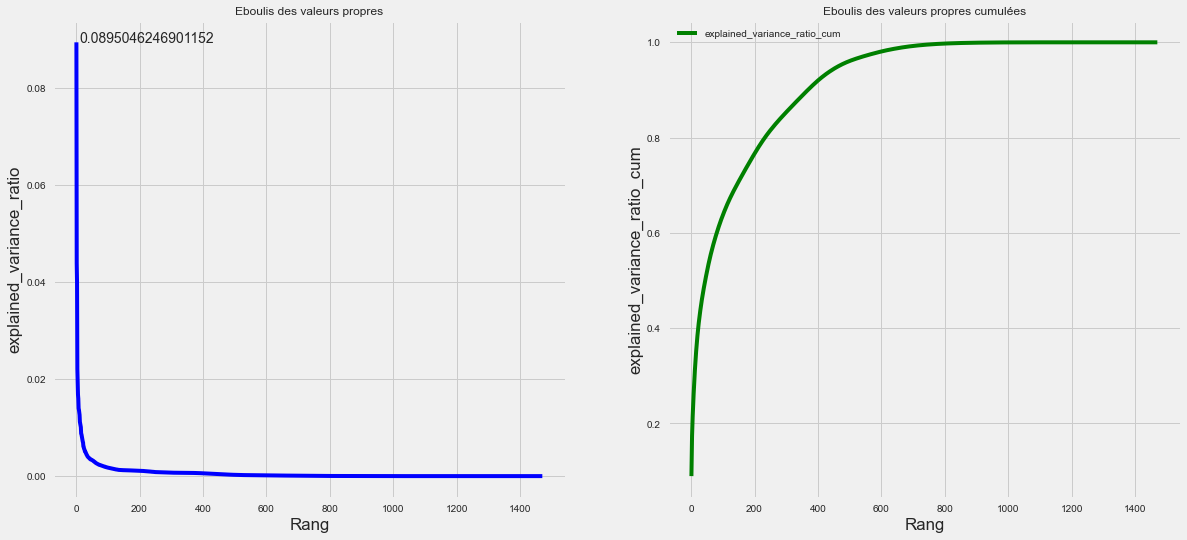

In [92]:
# Créer l'algorithme ACP
pca = decomposition.PCA(random_state=42)

Xtrain = app_train.drop(columns = ['TARGET']).values

# Entraîner l'ACP
pca.fit(Xtrain)

# Dessiner la variance expliquée absolue et cumulée
df_eboulis = MyMod.graph_eboulis_valeurspropres(pca, (18, 18), True)

In [93]:
print("{} composantes expliquent 80% de la variance"\
           .format(df_eboulis[df_eboulis['explained_variance_ratio_cum'] > 0.8]['rang'].min()))
print("{} composantes expliquent 70% de la variance"\
           .format(df_eboulis[df_eboulis['explained_variance_ratio_cum'] > 0.7]['rang'].min()))
print("{} composantes expliquent 60% de la variance"\
           .format(df_eboulis[df_eboulis['explained_variance_ratio_cum'] > 0.6]['rang'].min()))

233 composantes expliquent 80% de la variance
144 composantes expliquent 70% de la variance
81 composantes expliquent 60% de la variance


In [94]:
# Relancer une ACP à 60%
pca = PCA(n_components=0.6, random_state=42)

Xtrain = app_train.drop(columns = ['TARGET']).values
Xtest = app_test.values

# Fit and transform on the training data
Xtrain_pca= pca.fit_transform(Xtrain)
# Transform the testing data
Xtest_pca = pca.transform(Xtest)

### Récupérer les coordonnées des composantes principales dans l'espace des features 
triées par ordre décroissant de la variance expliquée explained_variance_

In [95]:
df_contrib_PC = pd.DataFrame(pca.components_, columns=app_train.drop(columns = ['TARGET']).columns) 
df_contrib_PC.shape 

(81, 1470)

 > coordonnées de 81 composantes principales dans l'espace de 1 470 features

### Identifier le mot le mieux représenté sur chaque composante principale

In [96]:
df_contrib_PC_t = df_contrib_PC.transpose()
df_contrib_PC_t.head()

0             1             2             3   \
FLAG_MOBIL        1.225169e-07 -2.586872e-08  1.418271e-07  3.276492e-08   
FLAG_EMP_PHONE   -1.062102e-04  4.268523e-03 -5.135380e-03 -8.747782e-03   
FLAG_CONT_MOBILE  4.629478e-05 -1.052683e-05  2.972571e-05  2.351751e-06   
FLAG_PHONE        1.099534e-03 -1.911081e-03 -5.702478e-05 -3.211462e-03   
FLAG_DOCUMENT_3   3.038805e-03 -3.947897e-04  1.308906e-03 -6.784082e-03   

                            4             5             6             7   \
FLAG_MOBIL        1.728413e-07  9.025359e-08 -3.439375e-08  7.838579e-08   
FLAG_EMP_PHONE   -1.349316e-02 -6.410813e-03  7.004389e-03  1.693026e-02   
FLAG_CONT_MOBILE  3.937326e-05 -6.242575e-06  2.158397e-05 -2.612733e-05   
FLAG_PHONE        4.985200e-03  5.359761e-03 -1.710167e-03  3.479031e-04   
FLAG_DOCUMENT_3  -3.177978e-03 -4.340994e-03  2.556752e-03  7.161281e-03   

                            8             9             10            11  \
FLAG_MOBIL        1.300393e-07 -4.043081e-07  2.256282e-07 -1.821664e-07   
FLAG_EMP_PHONE   -1.496893e-02  1.147905e-02 -5.913323e-03 -1.380710e-03   
FLAG_CONT_MOBILE  4.830309e-05 -1.031582e-04  5.198277e-05 -6.099009e-05   
FLAG_PHONE        1.264341e-03  4.283741e-03 -4.180498e-03 -1.620222e-03   
FLAG_DOCUMENT_3  -2.005082e-03 -5.191503e-03 -5.047364e-04 -7.479798e-03   

                            12            13            14            15  \
FLAG_MOBIL       -1.920809e-08  5.608333e-08 -1.805962e-07  2.499408e-08   
FLAG_EMP_PHONE    5.962013e-03 -8.644094e-04  1.088134e-02  1.952575e-02   
FLAG_CONT_MOBILE  2.349239e-06  8.872732e-06 -2.113375e-05 -3.165421e-06   
FLAG_PHONE        4.813277e-04  1.720414e-03 -3.180589e-03  1.420820e-03   
FLAG_DOCUMENT_3   3.595637e-03 -2.674124e-03  3.477438e-03  3.545128e-03   

                            16            17            18            19  \
FLAG_MOBIL       -6.709680e-08 -3.102871e-07  5.544585e-08 -1.958937e-07   
FLAG_EMP_PHONE    2.475859e-03  1.691140e-02 -2.992345e-02 -1.244277e-02   
FLAG_CONT_MOBILE -1.207526e-05 -2.519385e-05 -9.057739e-06 -5.896079e-05   
FLAG_PHONE       -1.417113e-03 -4.680598e-03 -3.093754e-04 -2.865315e-03   
FLAG_DOCUMENT_3   1.793902e-03  8.656790e-03 -5.711586e-03 -3.386684e-03   

                            20            21            22            23  \
FLAG_MOBIL        3.538899e-08  4.200053e-07 -4.577706e-07  6.419531e-07   
FLAG_EMP_PHONE    1.956002e-02  6.993209e-03  3.219009e-02 -1.105836e-02   
FLAG_CONT_MOBILE -6.417210e-06  1.509979e-04 -1.744039e-04  3.447652e-04   
FLAG_PHONE        2.906692e-03  3.499080e-03  2.291474e-03  1.805549e-03   
FLAG_DOCUMENT_3   5.123216e-03 -2.933324e-03  6.701418e-03  1.054592e-03   

                            24            25            26            27  \
FLAG_MOBIL        3.149671e-07  3.075076e-07 -7.086973e-07  5.141138e-09   
FLAG_EMP_PHONE   -1.120027e-02 -1.936455e-02  2.483870e-02  4.024296e-03   
FLAG_CONT_MOBILE -1.687922e-05  1.202056e-05 -1.205460e-04  2.446776e-06   
FLAG_PHONE       -1.474788e-04 -2.674925e-03 -2.671927e-03 -4.017605e-03   
FLAG_DOCUMENT_3  -1.744527e-03 -2.405454e-03 -3.549823e-03  3.127550e-03   

                            28            29            30        31  \
FLAG_MOBIL       -7.583584e-08 -5.764637e-07 -4.144893e-08  0.000001   
FLAG_EMP_PHONE   -3.672988e-03  6.370644e-03 -2.311958e-03 -0.015563   
FLAG_CONT_MOBILE -1.434889e-05 -1.483677e-04 -3.861519e-05  0.000443   
FLAG_PHONE        3.162410e-03  2.099426e-03  8.586763e-04  0.001207   
FLAG_DOCUMENT_3  -3.887014e-03  2.769719e-03 -2.848875e-03  0.002449   

                            32            33            34            35  \
FLAG_MOBIL        1.345706e-07 -2.624383e-07  6.190392e-08 -2.129587e-07   
FLAG_EMP_PHONE   -4.907227e-03  9.092107e-03  1.074370e-02  9.823924e-04   
FLAG_CONT_MOBILE -4.449553e-05  5.740005e-05  3.035646e-04 -7.740311e-05   
FLAG_PHONE        3.133681e-03 -4.421512e-03 -4.548870e-03  9.777233e-04   
FLAG_DOCUMENT_3 

In [97]:
lst_contrib = []
for i in range(pca.n_components_):     
    # Retenir le feature qui est le plus grand pour chaque composante principale
    lst_contrib.append(df_contrib_PC_t[i].idxmax(axis=0))  # axis 0 pour parcours le long des lignes (features)    

### Tronquer le résultat issu de l'ACP

In [98]:
# Xtrain_pca: Coordonnées de clients projetés sur les axes principaux
app_train_pca = pd.DataFrame(Xtrain_pca, columns=lst_contrib)  
app_test_pca = pd.DataFrame(Xtest_pca, columns=lst_contrib)  
app_train_pca.shape

(307511, 81)

In [99]:
# Dé-dupliquer les colonnes identiques
app_train_pca = app_train_pca.T.groupby(level=0).first().T
app_test_pca = app_test_pca.T.groupby(level=0).first().T
app_train_pca.shape

(307511, 70)

In [100]:
Xtrain_pca = app_train_pca.values
Xtest_pca = app_test_pca.values

print("Dimensions train après réduction pca : ", app_train_pca.shape)
print("Dimensions test après réduction pca : ", app_test_pca.shape)

Dimensions train après réduction pca :  (307511, 70)
Dimensions test après réduction pca :  (48744, 70)


## Réduire avec un modèle gradient boosting <a class="anchor" id="sub5_2"></a> 

In [101]:
second_round_zero_features, feature_importances = \
         MyMod.identify_zero_importance_features(app_train.drop(columns = ['TARGET']), ytrain, 1)

[200]	valid_0's auc: 0.782117	valid_0's binary_logloss: 0.507608

There are 653 features with 0.0 importance


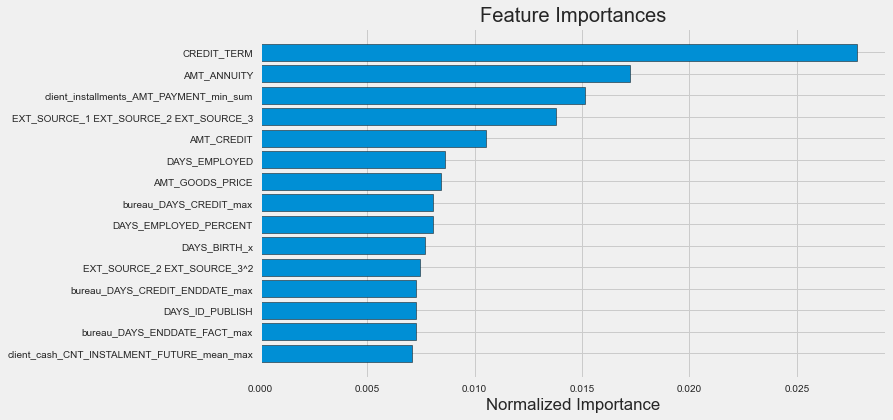

In [102]:
norm_feature_importances = MyMod.plot_feature_importances(feature_importances)

 > CREDIT_TERM = Loan annuity / Credit amount of the loan

In [103]:
# Limiter le nombre de features avec lgbm: amélioration possible
seuil = 39

minor_features = list(feature_importances[feature_importances['importance'] < seuil]['feature'])
print('\nThere are %d minor features' % len(minor_features))


There are 1459 minor features


In [104]:
feature_importances[feature_importances['importance'] >= seuil]

feature  importance
239                               CREDIT_TERM       145.0
12                                AMT_ANNUITY        90.0
1460  client_installments_AMT_PAYMENT_min_sum        79.0
261    EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3        72.0
11                                 AMT_CREDIT        55.0
16                              DAYS_EMPLOYED        45.0
13                            AMT_GOODS_PRICE        44.0
334                    bureau_DAYS_CREDIT_max        42.0
240                     DAYS_EMPLOYED_PERCENT        42.0
15                               DAYS_BIRTH_x        40.0
269               EXT_SOURCE_2 EXT_SOURCE_3^2        39.0

In [105]:
app_train_lgbm = app_train.drop(columns = ['TARGET']).drop(columns=minor_features)
app_test_lgbm = app_test.drop(columns=minor_features)

Xtrain_lgbm = app_train_lgbm.values
Xtest_lgbm = app_test_lgbm.values

print("Dimensions train après réduction gradient boosting : ", app_train_lgbm.shape)
print("Dimensions test après réduction gradient boosting : ", app_test_lgbm.shape)

Dimensions train après réduction gradient boosting :  (307511, 11)
Dimensions test après réduction gradient boosting :  (48744, 11)


# Préparer les jeux d'entraînement et de validation <a class="anchor" id="chapter6"></a> 

In [106]:
Xtrain_pca = app_train_pca.values
Xtest_pca = app_test_pca.values

Xtrain_lgbm = app_train_lgbm.values
Xtest_lgbm = app_test_lgbm.values

## Isoler un jeu de validation au sein du jeu d'entraînement <a class="anchor" id="sub6_1"></a> 

In [107]:
# Initier un array avec les index des individus pour pouvoir identifier ceux qui sont alloués à traintrain
ind_train = np.arange(0, len(ytrain), 1)

Xtraintrain_pca, Xtrainval_pca, ytraintrain_pca, ytrainval_pca, ind_traintrain, ind_trainval = \
    train_test_split(Xtrain_pca, ytrain, ind_train, test_size=0.20, stratify=ytrain, random_state=42)
print("Dimensions train pca : ", Xtraintrain_pca.shape)
print("Dimensions validation pca : ", Xtrainval_pca.shape)

Xtraintrain_lgbm, Xtrainval_lgbm, ytraintrain_lgbm, ytrainval_lgbm = \
    train_test_split(Xtrain_lgbm, ytrain, test_size=0.20, stratify=ytrain, random_state=42)
print("Dimensions train lgbm : ", Xtraintrain_lgbm.shape)
print("Dimensions validation lgbm : ", Xtrainval_lgbm.shape)

Dimensions train pca :  (246008, 70)
Dimensions validation pca :  (61503, 70)
Dimensions train lgbm :  (246008, 11)
Dimensions validation lgbm :  (61503, 11)


## Ré-équilibrer le jeu d'entraînement <a class="anchor" id="sub6_2"></a> 

In [108]:
print("Dimensions X train pca : ", Xtraintrain_pca.shape)
print("Dimensions y train pca : ", ytraintrain_pca.shape)

Dimensions X train pca :  (246008, 70)
Dimensions y train pca :  (246008,)


In [109]:
print("Effectif de la classe TARGET = 1 : ", np.count_nonzero(ytraintrain_pca == 1))
print("Effectif de la classe TARGET = 0: ", np.count_nonzero(ytraintrain_pca == 0))

Effectif de la classe TARGET = 1 :  19860
Effectif de la classe TARGET = 0:  226148


### Réduire aléatoirement le nombre de samples

In [110]:
# Initialiser les positions
ind_sample = np.arange(len(ytraintrain_pca))

# Permuter aléatoirement les positions
ind_sample = shuffle(ind_sample, random_state=42)

# Prendre les TargetSize premières positions
TargetSize = 5000
ind_sample = ind_sample[:TargetSize]
ind_sample

array([161368, 177644,  42295, ..., 220446, 109076, 109705])

 > array([161368, 177644,  42295, ..., 220446, 109076, 109705])

In [111]:
Xtraintrain_pca = Xtraintrain_pca[ind_sample]
ytraintrain_pca = ytraintrain_pca[ind_sample]

Xtraintrain_lgbm = Xtraintrain_lgbm[ind_sample]
ytraintrain_lgbm = ytraintrain_lgbm[ind_sample]

print("Dimensions X train pca : ", Xtraintrain_pca.shape)
print("Dimensions y train pca : ", ytraintrain_pca.shape)

print("Effectif de la classe TARGET = 1 : ", np.count_nonzero(ytraintrain_pca == 1))
print("Effectif de la classe TARGET = 0: ", np.count_nonzero(ytraintrain_pca == 0))

Dimensions X train pca :  (5000, 70)
Dimensions y train pca :  (5000,)
Effectif de la classe TARGET = 1 :  401
Effectif de la classe TARGET = 0:  4599


### Enrichir la classe minoritaire avec SMOTE

In [112]:
# Enrichir Xtraintrain pour pouvoir en suite identifier l'enrichissement
Wtraintrain_pca = pd.DataFrame(Xtraintrain_pca).reset_index().values
Wtraintrain_lgbm = pd.DataFrame(Xtraintrain_lgbm).reset_index().values

# Instancier l'oversampler
over = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=42, n_jobs=-1)

# Transformer le jeu de données
Wtraintrain_pca_balanced, ytraintrain_pca_balanced = over.fit_resample(Wtraintrain_pca, ytraintrain_pca)
Xtraintrain_pca_balanced = Wtraintrain_pca_balanced[:,1:]
print("Dimensions X train pca balanced : ", Xtraintrain_pca_balanced.shape)
print("Dimensions y train pca balanced : ", ytraintrain_pca_balanced.shape)

Wtraintrain_lgbm_balanced, ytraintrain_lgbm_balanced = over.fit_resample(Wtraintrain_lgbm, ytraintrain_lgbm)
Xtraintrain_lgbm_balanced = Wtraintrain_lgbm_balanced[:,1:]
print("Dimensions X train lgbm balanced : ", Xtraintrain_lgbm_balanced.shape)
print("Dimensions y train lgbm balanced : ", ytraintrain_lgbm_balanced.shape)

print("Effectif de la classe TARGET = 1 : ", np.count_nonzero(ytraintrain_pca_balanced == 1))
print("Effectif de la classe TARGET = 0: ", np.count_nonzero(ytraintrain_pca_balanced == 0))

Dimensions X train pca balanced :  (9198, 70)
Dimensions y train pca balanced :  (9198,)
Dimensions X train lgbm balanced :  (9198, 11)
Dimensions y train lgbm balanced :  (9198,)
Effectif de la classe TARGET = 1 :  4599
Effectif de la classe TARGET = 0:  4599


 > Le jeu d'entraînement est désormais équilibré

### Préparer l'échantillon similaire avec les données brutes pour pouvoir les exploiter dans notre fonction de coût

In [113]:
# Sélectionner les individus retenus lors du train_test_split
df_temp = app_train_desc.iloc[ind_traintrain]
df_temp.reset_index(drop=True, inplace=True)

# Sélectionner les individus retenus lors de l'échantillonage
df_temp2 = df_temp.iloc[ind_sample]
df_temp2.reset_index(drop=True, inplace=True)
df_temp2

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                      0             0                0             0   
1                      0             1                1             0   
2                      0             0                1             1   
3                      0             1                1             1   
4                      0             0                1             0   
...                  ...           ...              ...           ...   
4995                   0             0                1             0   
4996                   0             0                1             0   
4997                   0             0                1             0   
4998                   0             0                1             2   
4999                   0             1                0             0   

      AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             360000.0   1381113.0      39712.5        1206000.0   
1              45000.0    227520.0      10606.5         180000.0   
2             157500.0    848745.0      46174.5         675000.0   
3             270000.0   1264428.0      37098.0         990000.0   
4             130500.0    202500.0      11754.0         202500.0   
...                ...         ...          ...              ...   
4995          121500.0    274500.0      20020.5         274500.0   
4996          135000.0    191880.0      20286.0         180000.0   
4997          112500.0    564124.5      44698.5         481500.0   
4998          135000.0    203760.0      16227.0         180000.0   
4999          180000.0    756000.0      22234.5         756000.0   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH_x  DAYS_EMPLOYED  \
0                       0.011657         10015        -1010.0   
1                       0.015221         18273        -1114.0   
2                       0.008575         12806        -1408.0   
3                       0.046220         14253         -664.0   
4                       0.001333         19624       -11383.0   
...                          ...           ...            ...   
4995                    0.001417         14090         -673.0   
4996                    0.006207         23138        -1648.0   
4997                    0.032561         18851         -508.0   
4998                    0.028663         11807        -1520.0   
4999                    0.028663         21091        -2280.0   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0                -320.0            -2119          9.0           1   
1               -2501.0             -145         19.0           1   
2               -2894.0            -5321          9.0           1   
3               -8233.0            -4659          6.0           1   
4               -8102.0            -3123          9.0           1   
...                 ...              ...          ...         ...   
4995             -811.0             -572          9.0           1   
4996            -6097.0            -4164          9.0           1   
4997            -9727.0            -2401          9.0           1   
4998            -2270.0            -2901          9.0           1   
4999            -5148.0            -3991         21.0           1   

      FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0                  1                0                 1           0   
1                  1                1                 1           1   
2                  1                0                 1           0   
3                  1                0                 1           1   
4                  1                0                 1           0   
...              ...              ...               ...         ...   
4995               1                0                 1           0   
4996               0                0                 1           0   
4997               1                0                 1        

In [114]:
# Enrichir les individus retenus lors de l'oversampling
collst = df_temp2.columns[:len(df_temp2.columns)-1]
Xtraintrain_desc = df_temp2[collst].values
ytraintrain_desc = df_temp2['TARGET'].values
Xtraintrain_balanced_desc, ytraintrain_balanced_desc = over.fit_resample(Xtraintrain_desc, ytraintrain_desc)
df_X = pd.DataFrame(Xtraintrain_balanced_desc, columns=collst)
df_y = pd.DataFrame(ytraintrain_balanced_desc, columns=['TARGET'])
df_traintrain_balanced_desc = df_X.merge(df_y, left_index=True, right_index=True)
df_traintrain_balanced_desc

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                    0.0           0.0         0.000000      0.000000   
1                    0.0           1.0         1.000000      0.000000   
2                    0.0           0.0         1.000000      1.000000   
3                    0.0           1.0         1.000000      1.000000   
4                    0.0           0.0         1.000000      0.000000   
...                  ...           ...              ...           ...   
9193                 0.0           0.0         0.762445      1.475111   
9194                 0.0           0.0         0.099688      1.900312   
9195                 0.0           0.0         1.000000      0.670364   
9196                 0.0           0.0         1.000000      0.105220   
9197                 0.0           0.0         0.000000      0.000000   

      AMT_INCOME_TOTAL    AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
0        360000.000000  1.381113e+06  39712.500000     1.206000e+06   
1         45000.000000  2.275200e+05  10606.500000     1.800000e+05   
2        157500.000000  8.487450e+05  46174.500000     6.750000e+05   
3        270000.000000  1.264428e+06  37098.000000     9.900000e+05   
4        130500.000000  2.025000e+05  11754.000000     2.025000e+05   
...                ...           ...           ...              ...   
9193     125500.989887  1.620211e+05  14747.088100     1.467080e+05   
9194     116985.949219  9.005246e+05  29929.125779     6.507759e+05   
9195      97666.380836  3.900392e+05  21297.328820     3.345333e+05   
9196     110132.560007  3.973790e+05  31245.375255     3.699544e+05   
9197     134277.332106  2.381608e+05  12923.685927     2.038314e+05   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH_x  DAYS_EMPLOYED  \
0                       0.011657  10015.000000   -1010.000000   
1                       0.015221  18273.000000   -1114.000000   
2                       0.008575  12806.000000   -1408.000000   
3                       0.046220  14253.000000    -664.000000   
4                       0.001333  19624.000000  -11383.000000   
...                          ...           ...            ...   
9193                    0.019300  14193.635780    -997.968997   
9194                    0.027870  18512.700937   -9212.043191   
9195                    0.015942  13461.933448   -2641.557327   
9196                    0.008114   9522.367026   -1080.788736   
9197                    0.019019  12802.681285   -2495.291547   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -320.000000     -2119.000000          9.0         1.0   
1          -2501.000000      -145.000000         19.0         1.0   
2          -2894.000000     -5321.000000          9.0         1.0   
3          -8233.000000     -4659.000000          6.0         1.0   
4          -8102.000000     -3123.000000          9.0         1.0   
...                 ...              ...          ...         ...   
9193       -4403.455248     -3780.907276          9.0         1.0   
9194      -14738.712153      -143.771607          9.0         1.0   
9195       -7512.326510     -4496.013512          9.0         1.0   
9196       -4015.415095     -2195.050539          9.0         1.0   
9197       -5552.078437     -2054.457086          9.0         1.0   

      FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0                1.0         0.000000               1.0    0.000000   
1                1.0         1.000000               1.0    1.000000   
2                1.0         0.000000               1.0    0.000000   
3                1.0         0.000000               1.0    1.000000   
4                1.0         0.000000               1.0    0.000000   
...              ...              ...               ...         ...   
9193             1.0         0.762445               1.0    0.762445   
9194             1.0         0.000000               1.0    0.000000   
9195             1.0       

In [115]:
# Sélectionner les individus retenus lors du train_test_split
df_trainval_desc = app_train_desc.iloc[ind_trainval]
df_trainval_desc

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
256571                   0             1                1             1   
191493                   0             0                0             0   
103497                   0             0                1             0   
130646                   0             0                0             0   
211898                   0             0                1             0   
...                    ...           ...              ...           ...   
16213                    0             0                1             0   
294620                   0             1                1             0   
234384                   0             1                1             1   
149027                   0             1                1             0   
268861                   0             1                1             1   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
256571          157500.0    770292.0      30676.5         688500.0   
191493           90000.0    364896.0      19926.0         315000.0   
103497          148500.0    284400.0      18643.5         225000.0   
130646          188100.0    976711.5      38218.5         873000.0   
211898          180000.0    323194.5      19660.5         279000.0   
...                  ...         ...          ...              ...   
16213           162000.0    834048.0      27693.0         720000.0   
294620          180000.0   1305000.0      38155.5        1305000.0   
234384          360000.0    239850.0      27058.5         225000.0   
149027          337500.0    900000.0      45954.0         900000.0   
268861          225000.0    260640.0      28197.0         225000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH_x  DAYS_EMPLOYED  \
256571                    0.010147         13506         -105.0   
191493                    0.007330         17723        -4930.0   
103497                    0.014464         24200        -1191.0   
130646                    0.020713          9650         -355.0   
211898                    0.035792         17487        -1366.0   
...                            ...           ...            ...   
16213                     0.022625         20906        -1648.0   
294620                    0.018850         17790        -1188.0   
234384                    0.010276         13369        -1194.0   
149027                    0.009630         11364        -1086.0   
268861                    0.007020         16752        -1208.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
256571            -2876.0            -4402         19.0           1   
191493            -4654.0            -1259          9.0           1   
103497           -12511.0            -2474          9.0           1   
130646             -969.0            -2289          9.0           1   
211898           -10063.0            -1040          9.0           1   
...                   ...              ...          ...         ...   
16213             -7631.0            -3949          9.0           1   
294620           -10377.0            -1325         24.0           1   
234384            -7353.0            -2815          5.0           1   
149027            -1312.0            -3991          7.0           1   
268861            -5153.0             -301         32.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
256571               1                0                 1           0   
191493               1                0                 1           0   
103497               1                0                 1           1   
130646               1                1                 1           0   
211898               1                0                 1           0   
...                ...              ...               ...         ...   
16213                0                0                 1           0   
294620               1  

## Préparer les DataFrames  <a class="anchor" id="sub6_3"></a> 

In [116]:
# Préparer df_traintrain_lgbm_balanced
print("Dimensions X train lgbm balanced : ", Xtraintrain_lgbm_balanced.shape)
print("Dimensions y train lgbm balanced : ", ytraintrain_lgbm_balanced.shape)

df_xtraintrain_lgbm_balanced = pd.DataFrame(Xtraintrain_lgbm_balanced, columns=app_train_lgbm.columns)
df_ytraintrain_lgbm_balanced = pd.DataFrame(ytraintrain_lgbm_balanced, columns=['TARGET'], dtype=np.float64)

df_traintrain_lgbm_balanced = pd.merge(df_xtraintrain_lgbm_balanced, df_ytraintrain_lgbm_balanced,\
                                     left_index=True, right_index=True)
print("Dimensions df_traintrain_lgbm_balanced : ", df_traintrain_lgbm_balanced.shape)

Dimensions X train lgbm balanced :  (9198, 11)
Dimensions y train lgbm balanced :  (9198,)
Dimensions df_traintrain_lgbm_balanced :  (9198, 12)


In [117]:
# Préparer df_trainval_lgbm
df_xtrainval_lgbm = pd.DataFrame(Xtrainval_lgbm, columns=app_train_lgbm.columns)
df_ytrainval_lgbm = pd.DataFrame(ytrainval_lgbm, columns=['TARGET'], dtype=np.float64)
df_trainval_lgbm = pd.merge(df_xtrainval_lgbm, df_ytrainval_lgbm, left_index=True, right_index=True)
print("Dimensions df_trainval_lgbm : ", df_trainval_lgbm.shape)

Dimensions df_trainval_lgbm :  (61503, 12)


In [118]:
print(df_traintrain_lgbm_balanced.dtypes.value_counts())

float64    12
dtype: int64


In [119]:
# Préparer df_traintrain_pca_balanced
print("Dimensions X train pca balanced : ", Xtraintrain_pca_balanced.shape)
print("Dimensions y train pca balanced : ", ytraintrain_pca_balanced.shape)

df_xtraintrain_pca_balanced = pd.DataFrame(Xtraintrain_pca_balanced, columns=app_train_pca.columns)
df_ytraintrain_pca_balanced = pd.DataFrame(ytraintrain_pca_balanced, columns=['TARGET'], dtype=np.float64)

df_traintrain_pca_balanced = pd.merge(df_xtraintrain_pca_balanced, df_ytraintrain_pca_balanced,\
                                     left_index=True, right_index=True)
print("Dimensions df_traintrain_pca_balanced : ", df_traintrain_pca_balanced.shape)

Dimensions X train pca balanced :  (9198, 70)
Dimensions y train pca balanced :  (9198,)
Dimensions df_traintrain_pca_balanced :  (9198, 71)


In [120]:
# Préparer df_trainval_pca
df_xtrainval_pca = pd.DataFrame(Xtrainval_pca, columns=app_train_pca.columns)
df_ytrainval_pca = pd.DataFrame(ytrainval_pca, columns=['TARGET'], dtype=np.float64)
df_trainval_pca = pd.merge(df_xtrainval_pca, df_ytrainval_pca, left_index=True, right_index=True)
print("Dimensions df_trainval_pca : ", df_trainval_pca.shape)

Dimensions df_trainval_pca :  (61503, 71)


In [121]:
print(df_traintrain_pca_balanced.dtypes.value_counts())

float64    71
dtype: int64


## Réduire les dimensions du jeu issu de l'ACP <a class="anchor" id="sub6_4"></a> 

In [122]:
# Find correlations with the target and sort
correlations = df_traintrain_pca_balanced.corr()
correlations['TARGET_Abs'] = np.abs(correlations['TARGET'])
df_keep = correlations[['TARGET_Abs']].sort_values(by='TARGET_Abs', ascending=False).head(15)
keep = df_keep.index.to_list()[1:]
keep.append('TARGET')
keep

['client_cash_CNT_INSTALMENT_FUTURE_count_mean',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'client_BB_MONTHS_BALANCE_sum_count',
 'client_credit_AMT_DRAWINGS_CURRENT_mean_mean',
 'client_cash_MONTHS_BALANCE_mean_max',
 'client_credit_AMT_TOTAL_RECEIVABLE_max_sum',
 'client_credit_CNT_DRAWINGS_POS_CURRENT_mean_mean',
 'client_credit_SK_DPD_DEF_max_mean',
 'client_credit_CNT_DRAWINGS_OTHER_CURRENT_min_sum',
 'client_installments_NUM_INSTALMENT_VERSION_max_max',
 'client_cash_NAME_CONTRACT_STATUS_Returned to the store_sum_mean',
 'previous_FLAG_LAST_APPL_PER_CONTRACT_N_mean',
 'client_BB_STATUS_C_sum_mean',
 'client_credit_AMT_DRAWINGS_CURRENT_min_mean',
 'TARGET']

In [123]:
df_traintrain_pca_balanced = df_traintrain_pca_balanced[keep]
df_trainval_pca = df_trainval_pca[keep]
print("Dimensions df_traintrain_pca_balanced : ", df_traintrain_pca_balanced.shape)
print("Dimensions df_trainval_pca : ", df_trainval_pca.shape)

Dimensions df_traintrain_pca_balanced :  (9198, 15)
Dimensions df_trainval_pca :  (61503, 15)


# Modèle de scoring crédit avec le jeu issu de la réduction avec l'ACP <a class="anchor" id="chapter8"></a> 
# qui évalue la probabilité de faillite du client

## Identifier le meilleur modèle  <a class="anchor" id="sub8_1"></a> 

In [124]:
# Initializes the training environment and creates the transformation pipeline
models_setup = setup(df_traintrain_pca_balanced, target='TARGET', silent=True, session_id=42) 

### Création de notre fonction de coût à minimiser

Le coût est exprimé en million d'euros.   
Il est proportionnel au montant du prêt.  
Comme l'ojectif est de s'assurer que les bonnes demandes ne sont pas rejetées, le coût d'un refus d'un bon dossier est 2 fois plus important que le coût d'un accord d'un mauvais dossier.  

In [125]:
def fonction_cout_ind(y, y_pred, **kwargs):
    tp = np.where((y_pred==1) & (y==1),  0, 0)      # refus d'un mauvais dossier
    fp = np.where((y_pred==1) & (y==0), 0.006, 0)   # refus d'un bon dossier coûte 0.6%
    tn = np.where((y_pred==0) & (y==0),  0, 0)      # accord d'un bon dossier
    fn = np.where((y_pred==0) & (y==1), 0.003, 0)   # accord d'un mauvais dossier 0.3%        
    return (tp+fp+tn+fn) * kwargs["amt"] / 1000000

def fonction_cout(y, y_pred, **kwargs):
    return fonction_cout_ind(y, y_pred, **kwargs).sum()

In [126]:
# Passer le montant du crédit en paramètre
kwargs = {"amt" : df_traintrain_balanced_desc['AMT_CREDIT'].values\
          .reshape((len(df_traintrain_balanced_desc), 1))}

# Ajout de la métrique dans PyCaret
add_metric(id='cout', name='Cout', score_func=fonction_cout, greater_is_better=False, **kwargs)

Name                                                              Cout
Display Name                                                      Cout
Score Function          <function fonction_cout at 0x000001AED8378A60>
Scorer               make_scorer(fonction_cout, greater_is_better=F...
Target                                                            pred
Args                 {'amt': [[1381113.0], [227520.0], [848745.0], ...
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: cout, dtype: object

In [127]:
# Comparer les modèles en privilégiant la fonction de coût
best_model = compare_models(sort='Cout', include=['dummy', 'lr', 'ridge', 'rf', 'svm', 'knn', 'xgboost'], round=3) 

## Optimiser le meilleur modèle <a class="anchor" id="sub8_2"></a> 

### Ajuster les hyper-paramètres du modèle de scoring

In [128]:
# Optimiser le meilleur modèle avec la fonction de coût
tuned_best_model = tune_model(best_model, optimize='Cout', round=3)

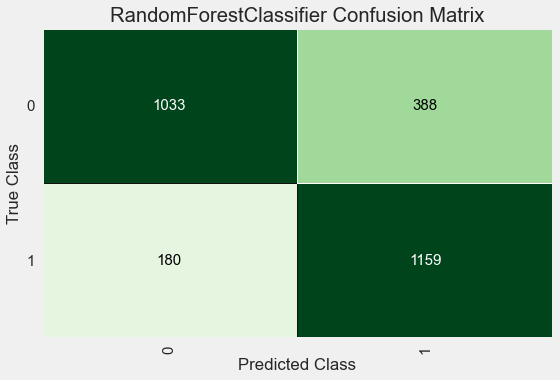

In [129]:
plot_model(tuned_best_model, plot = 'confusion_matrix')

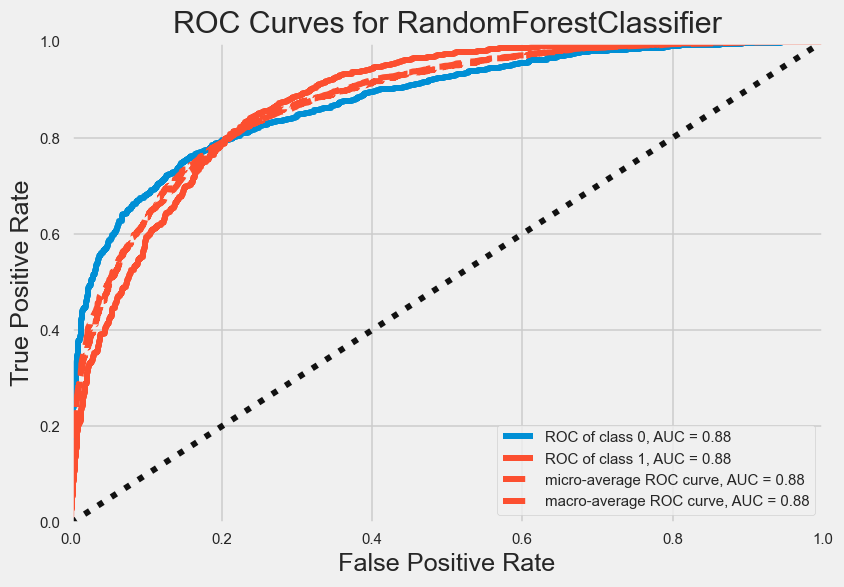

In [130]:
plot_model(tuned_best_model, plot = 'auc', scale=1.5)

### Tester situation de sur-apprentissage

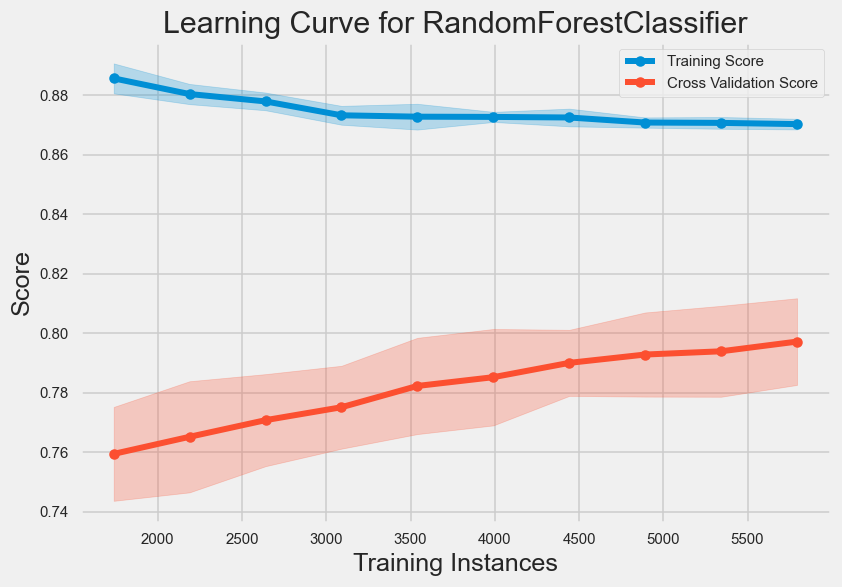

In [131]:
# Vérifier les progressions des scores d'apprentissage et de cross validation sur le jeu d'appentissage
plot_model(tuned_best_model, scale=1.5, plot='learning')        

### Calculer les prédictions 

In [132]:
df_traintrain_pca_balanced_pred = predict_model(tuned_best_model, data = df_traintrain_pca_balanced, raw_score=True)
df_traintrain_pca_balanced_pred.rename(columns={'Label':'PRED', 'Score_1.0':'Probabilité de défaut'}, inplace=True) 
df_traintrain_pca_balanced_pred['PRED'] = df_traintrain_pca_balanced_pred['PRED'].astype(np.float64)
df_traintrain_pca_balanced_pred.drop(columns={'Score_0.0'}, inplace=True) 

In [133]:
# Calculer recall et antispecificity
[recall, antispecificity, proba] = metrics.roc_curve(df_traintrain_pca_balanced_pred['TARGET'], \
                                        df_traintrain_pca_balanced_pred['PRED'], pos_label=1)
# Calculer l'AUROC
print("Area Under the ROC curve sur le jeu d'entrainement avec best_model:", metrics.auc(recall, antispecificity))

Area Under the ROC curve sur le jeu d'entrainement avec best_model: 0.8461622091759078


###  Dessiner le coût en fonction du seuil de probabilité  

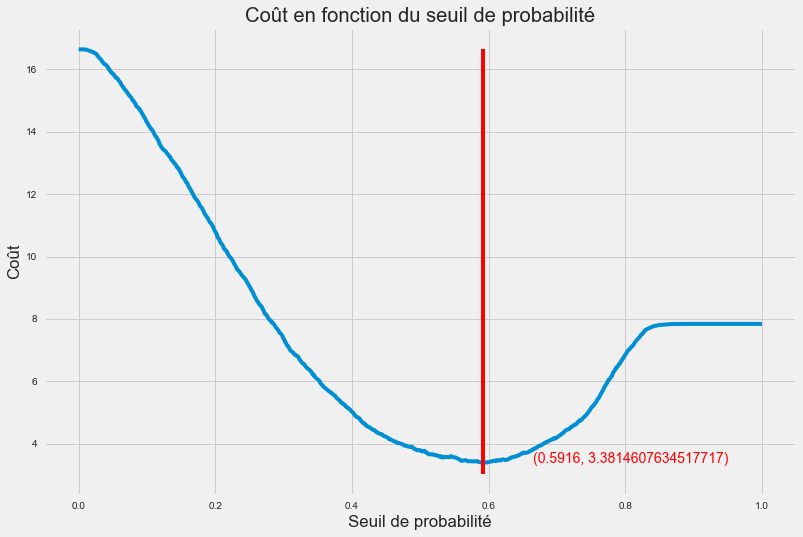

In [134]:
threshold = []
cost=[]

# Passer le montant du crédit en paramètre
kwargs = {"amt" : df_traintrain_balanced_desc['AMT_CREDIT'].values}

for thr in np.linspace(0, 1, 1000):
    
    # Récupération du seuil
    threshold = np.append(threshold, [thr], axis=0)
    
    # Calculer PRED_new en fonction de thr et de Probabilité de défaut
    # Si Probabilité de défaut < thr alors PRED_new = 0 sinon PRED_new = 1
    df_traintrain_pca_balanced_pred['PRED_new'] = 1.0
    df_traintrain_pca_balanced_pred['PRED_new'] = df_traintrain_pca_balanced_pred['PRED_new']\
                    .where((df_traintrain_pca_balanced_pred['Probabilité de défaut'] > thr), 0.0)

    # Calculer le coût de chaque demande en fonction de PRED_new 
    df_traintrain_pca_balanced_pred['Coût'] = fonction_cout_ind(df_traintrain_pca_balanced_pred['TARGET'], \
                                                                 df_traintrain_pca_balanced_pred['PRED_new'], **kwargs) 
    # Calculer le coût total 
    cost = np.append(cost, [df_traintrain_pca_balanced_pred['Coût'].sum()], axis=0)

# Calculer les coordonnées du minimum
threshold_min = threshold[cost.argmin()]
cost_min = cost[cost.argmin()]
cost_max = cost.max()

# Représenter le coût en fonction du seuil de probabilité
plot = plt.figure(figsize=(12, 8))
plt.plot(threshold, cost)
plt.xlabel("Seuil de probabilité")
plt.ylabel("Coût")
plt.title("Coût en fonction du seuil de probabilité")

# Dessiner le minimum
plt.plot([threshold_min, threshold_min], [cost_min*0.9, cost_max], color='red')    
label = "("+str(np.round(threshold_min, 4))+", "+str(cost_min)+")"
plt.annotate(label, # this is the text
             (threshold_min, cost_min), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(50, 0), # distance from text to points (x,y)
             ha='left', color='red') # horizontal alignment can be left, right or center

plt.show()

In [135]:
# Conserver la courbe de coût pour l'afficher dans l'API 
df_cost = pd.DataFrame(threshold, columns=['Seuil'])
df_cost = pd.merge(df_cost, pd.DataFrame(cost, columns=['Cout']), left_index=True, right_index=True)
df_cost

Seuil       Cout
0    0.000000  16.640668
1    0.001001  16.640668
2    0.002002  16.640668
3    0.003003  16.640668
4    0.004004  16.640668
..        ...        ...
995  0.995996   7.839349
996  0.996997   7.839349
997  0.997998   7.839349
998  0.998999   7.839349
999  1.000000   7.839349

[1000 rows x 2 columns]

In [136]:
# Mettre à jour PRED_new et Coût avec le seuil minimum
df_traintrain_pca_balanced_pred['PRED_new'] = 1.0
df_traintrain_pca_balanced_pred['PRED_new'] = df_traintrain_pca_balanced_pred['PRED_new']\
                .where((df_traintrain_pca_balanced_pred['Probabilité de défaut'] > threshold_min), 0.0)
df_traintrain_pca_balanced_pred['Coût'] = fonction_cout_ind(df_traintrain_pca_balanced_pred['TARGET'], \
                                                             df_traintrain_pca_balanced_pred['PRED_new'], **kwargs) 
df_traintrain_pca_balanced_pred

client_cash_CNT_INSTALMENT_FUTURE_count_mean  \
0                                        -0.010054   
1                                        -1.355263   
2                                        -1.414174   
3                                         2.065597   
4                                         2.716389   
...                                            ...   
9193                                     -1.753515   
9194                                      5.594661   
9195                                      3.692452   
9196                                      0.618068   
9197                                     -6.079840   

      EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  \
0                                  -0.318833   
1                                  -0.481466   
2                                  -2.155825   
3                                   1.466809   
4                                   5.464903   
...                                      ...   
9193                               -3.503178   
9194                               -2.235958   
9195                                0.531008   
9196                               -7.613376   
9197                               -1.293531   

      client_BB_MONTHS_BALANCE_sum_count  \
0                              -2.941626   
1                              -1.064998   
2                              21.527688   
3                              -2.235259   
4                               4.393799   
...                                  ...   
9193                            5.788261   
9194                           -4.310224   
9195                           -1.690289   
9196                            0.041191   
9197                            2.595816   

      client_credit_AMT_DRAWINGS_CURRENT_mean_mean  \
0                                         0.259447   
1                                         1.477471   
2                                       -27.392848   
3                                         1.599874   
4                                         0.982371   
...                                            ...   
9193                                      3.336486   
9194                                     -3.348198   
9195                                      8.365698   
9196                                     -3.462864   
9197                                      0.928425   

      client_cash_MONTHS_BALANCE_mean_max  \
0                                0.139769   
1                                1.483868   
2                               -1.363451   
3                                2.976034   
4                                4.940006   
...                                   ...   
9193                             2.410564   
9194                            -1.724739   
9195                             0.553335   
9196                             1.828885   
9197                            -0.753245   

      client_credit_AMT_TOTAL_RECEIVABLE_max_sum  \
0                                      -4.868403   
1                                      -8.067644   
2                                      39.495617   
3                                      -7.407039   
4                                      -7.175215   
...                                          ...   
9193                                   -1.730542   
9194                                   -4.203573   
9195                                   13.449964   
9196                                   -0.721109   
9197                                   -4.007352   

      client_credit_CNT_DRAWINGS_POS_CURRENT_mean_mean  \
0                                            -0.238269   
1                                            -0.946861   
2                                             6.930740   
3                                            -0.600258   
4                                            -5.021622   
...                                                ...   
9193                          

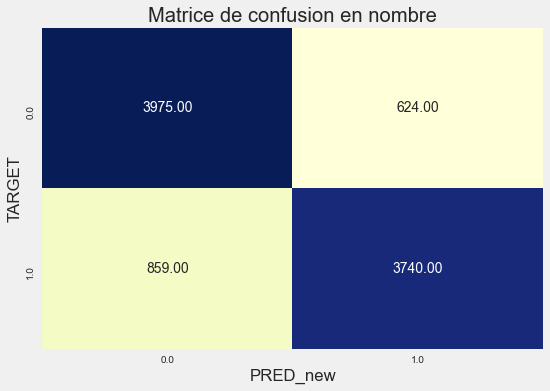

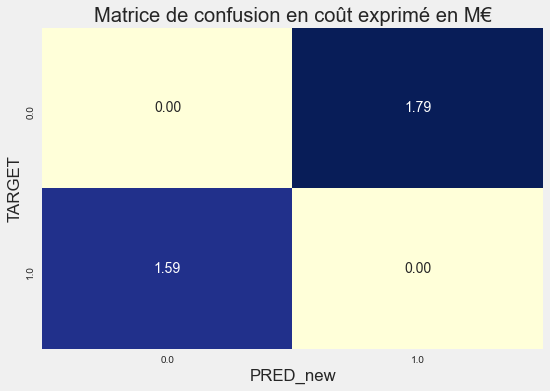

Coût global avec données d'entrainement PCA = 3.3814607634517717 M€


In [137]:
# Représenter la matrice de confusion en nombre 
contingency_matrix = pd.crosstab(df_traintrain_pca_balanced_pred['PRED_new'], df_traintrain_pca_balanced_pred['TARGET'])
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion en nombre')
plt.show()

# Représenter la matrice de confusion en coût
cost_matrix = pd.crosstab(index=df_traintrain_pca_balanced_pred['PRED_new'], \
                          columns=df_traintrain_pca_balanced_pred['TARGET'], \
                          values=df_traintrain_pca_balanced_pred['Coût'], aggfunc='sum')
res = sns.heatmap(cost_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion en coût exprimé en M€')
plt.show()

# Calculer le coût global
print("Coût global avec données d'entrainement PCA = {} M€".format(cost_matrix.sum().sum()))

In [138]:
# Calculer l'AUROC
[recall, antispecificity, proba] = metrics.roc_curve(df_traintrain_pca_balanced_pred['TARGET'], \
                                        df_traintrain_pca_balanced_pred['PRED_new'], pos_label=1)
print("Area Under the ROC curve sur le jeu d'entrainement avec tuned_best_model et seuil min:", \
      metrics.auc(recall, antispecificity))

# Calculer recall et specificity
recall = metrics.recall_score(df_traintrain_pca_balanced_pred['TARGET'], \
                              df_traintrain_pca_balanced_pred['PRED_new'], pos_label=1)
tn, fp, fn, tp = confusion_matrix(df_traintrain_pca_balanced_pred['TARGET'], \
                                  df_traintrain_pca_balanced_pred['PRED_new']).ravel()
specificity = tn / (tn+fp)
print("Sur le jeu d'entrainement, rappel={}, spécificité={}".format(recall, specificity))

Area Under the ROC curve sur le jeu d'entrainement avec tuned_best_model et seuil min: 0.8387692976734072
Sur le jeu d'entrainement, rappel=0.8132202652750598, spécificité=0.8643183300717547


 > rappel: % des mauvaises demandes sont bien refusés    
 > spécificité: % des bonnes demandes sont bien accordées  

## Analyser les résultats du meilleur modèle <a class="anchor" id="sub8_3"></a>

### Vérifier la bonne généralisation avec le jeu de validation

In [139]:
def predict_cout(model, threshold, df, **kwargs):
    
    # Mettre à jour PRED et Probabilité de défaut avec model
    df_pred = predict_model(model, data = df, raw_score=True)
    df_pred.rename(columns={'Label':'PRED', 'Score_1.0':'Probabilité de défaut'}, inplace=True) 
    df_pred['PRED'] = df_pred['PRED'].astype(np.float64)
    df_pred.drop(columns={'Score_0.0'}, inplace=True) 

    # Mettre à jour PRED_new et Coût avec le seuil minimum en utilisant Probabilité de défaut 
    df_pred['PRED_new'] = 1.0
    df_pred['PRED_new'] = df_pred['PRED_new'].where((df_pred['Probabilité de défaut'] > threshold), 0.0)
    df_pred['Coût'] = fonction_cout_ind(df_pred['TARGET'], df_pred['PRED_new'], **kwargs) 
    
    return df_pred

In [140]:
# Passer le montant du crédit en paramètre
kwargs = {"amt" : df_trainval_desc['AMT_CREDIT'].values}

model_var_pca = list(df_trainval_pca.columns)
df_trainval_pca_pred = predict_cout(tuned_best_model, threshold_min, df_trainval_pca, **kwargs)
df_trainval_pca_pred

client_cash_CNT_INSTALMENT_FUTURE_count_mean  \
0                                         -6.155585   
1                                         -6.016938   
2                                         -1.579544   
3                                         -6.627416   
4                                         -4.737403   
...                                             ...   
61498                                      2.309786   
61499                                      0.101390   
61500                                     -0.121400   
61501                                     -2.335772   
61502                                     -3.227501   

       EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  \
0                                   -0.037858   
1                                   -2.351285   
2                                   -1.127261   
3                                   -1.725856   
4                                   -1.747781   
...                                       ...   
61498                               -1.689216   
61499                                9.485790   
61500                                3.359860   
61501                                3.466412   
61502                               -3.992518   

       client_BB_MONTHS_BALANCE_sum_count  \
0                                2.378304   
1                               -7.375608   
2                               -2.048093   
3                                0.921066   
4                               -0.225297   
...                                   ...   
61498                           -3.029588   
61499                           25.515425   
61500                            5.437035   
61501                            8.659312   
61502                           -2.285842   

       client_credit_AMT_DRAWINGS_CURRENT_mean_mean  \
0                                          0.455869   
1                                          1.380159   
2                                          1.183348   
3                                         -0.644674   
4                                          7.272208   
...                                             ...   
61498                                     -1.804953   
61499                                      0.095179   
61500                                      2.430941   
61501                                     -0.422190   
61502                                     -1.323431   

       client_cash_MONTHS_BALANCE_mean_max  \
0                                 1.550844   
1                                -2.832337   
2                                 2.372157   
3                                -2.798398   
4                                 2.381209   
...                                    ...   
61498                            -1.278935   
61499                             7.881536   
61500                            -1.300172   
61501                            -5.366850   
61502                             5.275509   

       client_credit_AMT_TOTAL_RECEIVABLE_max_sum  \
0                                      -10.510296   
1                                       -1.941570   
2                                       -4.652014   
3                                       -8.914527   
4                                       -5.112446   
...                                           ...   
61498                                   -4.149883   
61499                                   -2.252967   
61500                                   -6.978062   
61501                                   -3.037326   
61502                                   -2.840158   

       client_credit_CNT_DRAWINGS_POS_CURRENT_mean_mean  \
0                                              0.869082   
1                                              3.046115   
2                                             -0.803147   
3                                              3.945637   
4                                              1.513476   
...        

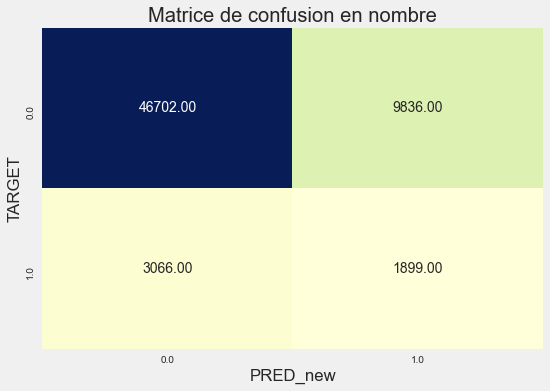

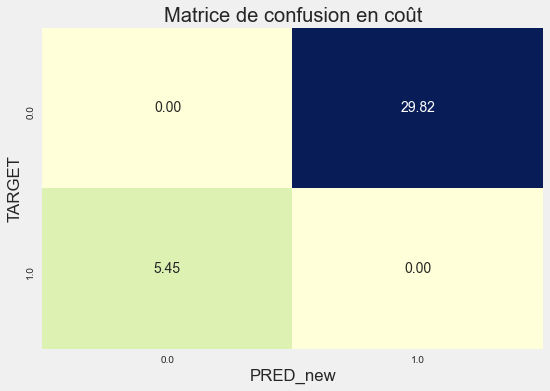

Coût global avec données de validation PCA = 35.273220363


In [141]:
# Représenter la matrice de confusion en nombre 
contingency_matrix = pd.crosstab(df_trainval_pca_pred['PRED_new'], df_trainval_pca_pred['TARGET'])
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion en nombre')
plt.show()

# Représenter la matrice de confusion en coût
cost_matrix = pd.crosstab(index=df_trainval_pca_pred['PRED_new'], \
                          columns=df_trainval_pca_pred['TARGET'], \
                          values=df_trainval_pca_pred['Coût'], aggfunc='sum')
res = sns.heatmap(cost_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion en coût')
plt.show()

# Calculer le coût global
print('Coût global avec données de validation PCA = {}'.format(cost_matrix.sum().sum()))

In [142]:
# Calculer l'AUROC
[recall, antispecificity, proba] = metrics.roc_curve(df_trainval_pca_pred['TARGET'], \
                                        df_trainval_pca_pred['PRED_new'], pos_label=1)
print("Area Under the ROC curve sur le jeu de validation:", metrics.auc(recall, antispecificity))

# Calculer recall et specificity
recall = metrics.recall_score(df_trainval_pca_pred['TARGET'], \
                              df_trainval_pca_pred['PRED_new'], pos_label=1)
tn, fp, fn, tp = confusion_matrix(df_trainval_pca_pred['TARGET'], \
                                  df_trainval_pca_pred['PRED_new']).ravel()
specificity = tn / (tn+fp)
print("Sur le jeu de validation, rappel={}, spécificité={}".format(recall, specificity))

Area Under the ROC curve sur le jeu de validation: 0.6042529265935517
Sur le jeu de validation, rappel=0.3824773413897281, spécificité=0.8260285117973752


### Identifier les variables importantes

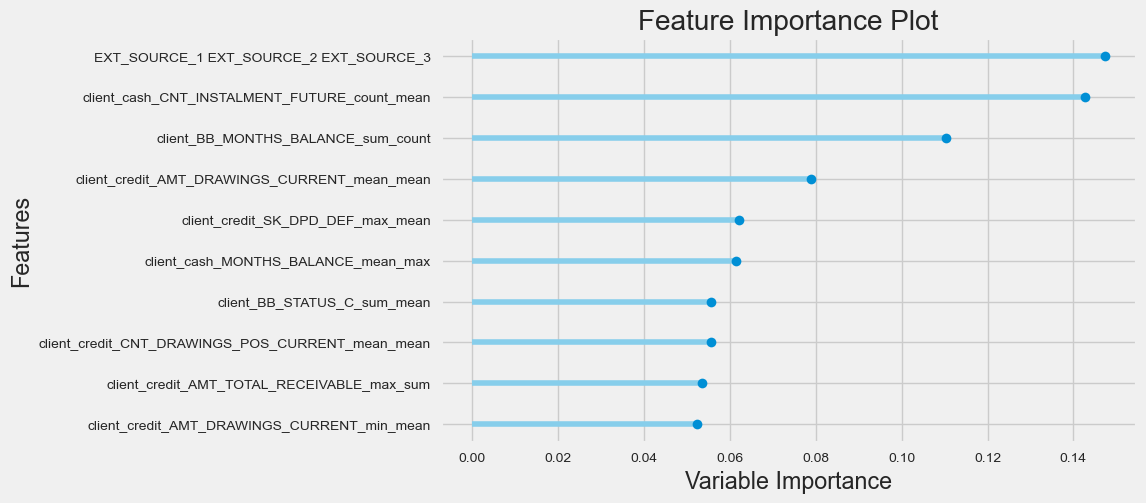

In [143]:
# les features les plus importantes seulement
plot_model(tuned_best_model, plot='feature')

In [144]:
# Récupérer les coefficients d'importance des variables les plus importantes
df_feature_imp = pd.DataFrame({'Feature': get_config('X_train').columns, \
               'Value' : abs(tuned_best_model.feature_importances_)}).sort_values(by='Value', ascending=False)
# Renommer l'importance globale des variables
df_feature_imp.rename(columns={"Value": "Weight"}, inplace=True)
df_feature_imp

Feature    Weight
1              EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  0.147333
0        client_cash_CNT_INSTALMENT_FUTURE_count_mean  0.142807
2                  client_BB_MONTHS_BALANCE_sum_count  0.110240
3        client_credit_AMT_DRAWINGS_CURRENT_mean_mean  0.078812
7                   client_credit_SK_DPD_DEF_max_mean  0.062224
4                 client_cash_MONTHS_BALANCE_mean_max  0.061466
12                        client_BB_STATUS_C_sum_mean  0.055707
6    client_credit_CNT_DRAWINGS_POS_CURRENT_mean_mean  0.055524
5          client_credit_AMT_TOTAL_RECEIVABLE_max_sum  0.053539
13        client_credit_AMT_DRAWINGS_CURRENT_min_mean  0.052414
9   client_installments_NUM_INSTALMENT_VERSION_max...  0.052383
10  client_cash_NAME_CONTRACT_STATUS_Returned to t...  0.044028
8    client_credit_CNT_DRAWINGS_OTHER_CURRENT_min_sum  0.043604
11        previous_FLAG_LAST_APPL_PER_CONTRACT_N_mean  0.039919

### Sauver le modèle

In [145]:
tuned_best_model_pca = tuned_best_model
df_feature_imp_pca = df_feature_imp
df_cost_pca = df_cost

# Modèle de scoring crédit avec le jeu issu de la réduction avec le gradient boosting <a class="anchor" id="chapter7"></a> 
# qui évalue la probabilité de faillite du client

## Identifier le meilleur modèle  <a class="anchor" id="sub7_1"></a> 

In [146]:
# Initializes the training environment and creates the transformation pipeline
models_setup = setup(df_traintrain_lgbm_balanced, target='TARGET', silent=True, session_id=42) 

In [147]:
# Passer le montant du crédit en paramètre
kwargs = {"amt" : df_traintrain_balanced_desc['AMT_CREDIT'].values.reshape((len(df_traintrain_balanced_desc), 1))}

# Ajout de la métrique dans PyCaret
add_metric(id='cout', name='Cout', score_func=fonction_cout, greater_is_better=False, **kwargs)

Name                                                              Cout
Display Name                                                      Cout
Score Function          <function fonction_cout at 0x000001AED8378A60>
Scorer               make_scorer(fonction_cout, greater_is_better=F...
Target                                                            pred
Args                 {'amt': [[1381113.0], [227520.0], [848745.0], ...
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: cout, dtype: object

In [148]:
get_metrics()

Name Display Name  \
ID                                  
acc         Accuracy     Accuracy   
auc              AUC          AUC   
recall        Recall       Recall   
precision  Precision        Prec.   
f1                F1           F1   
kappa          Kappa        Kappa   
mcc              MCC          MCC   
cout            Cout         Cout   

                                              Score Function  \
ID                                                             
acc          <function accuracy_score at 0x000001AE130C1C10>   
auc           <function roc_auc_score at 0x000001AE130B7AF0>   
recall     <pycaret.internal.metrics.BinaryMulticlassScor...   
precision  <pycaret.internal.metrics.BinaryMulticlassScor...   
f1         <pycaret.internal.metrics.BinaryMulticlassScor...   
kappa      <function cohen_kappa_score at 0x000001AE130C1...   
mcc        <function matthews_corrcoef at 0x000001AE130CB...   
cout          <function fonction_cout at 0x000001AED8378A60>   

                                                      Scorer      Target  \
ID                                                                         
acc                                                 accuracy        pred   
auc        make_scorer(roc_auc_score, needs_proba=True, e...  pred_proba   
recall              make_scorer(recall_score, average=macro)        pred   
precision     make_scorer(precision_score, average=weighted)        pred   
f1                   make_scorer(f1_score, average=weighted)        pred   
kappa                         make_scorer(cohen_kappa_score)        pred   
mcc                           make_scorer(matthews_corrcoef)        pred   
cout       make_scorer(fonction_cout, greater_is_better=F...        pred   

                                                        Args  \
ID                                                             
acc                                                       {}   
auc            {'average': 'weighted', 'multi_class': 'ovr'}   
recall                                  {'average': 'macro'}   
precision                            {'average': 'weighted'}   
f1                                   {'average': 'weighted'}   
kappa                                                     {}   
mcc                                                       {}   
cout       {'amt': [[1381113.0], [227520.0], [848745.0], ...   

           Greater is Better  Multiclass  Custom  
ID                                                
acc                     True        True   False  
auc                     True        True   False  
recall                  True        True   False  
precision               True        True   False  
f1                      True        True   False  
kappa                   True        True   False  
mcc                     True        True   False  
cout                   False        True    True

In [149]:
# Comparer les modèles en privilégiant la fonction de coût
best_model = compare_models(sort='Cout',  include=['dummy', 'lr', 'ridge', 'rf', 'svm', 'knn', 'xgboost'], round=3) 

In [150]:
# Prédire les demandes en défaut et la probabilité de défaut associée (PRED, Probabilité de défaut)
df_traintrain_lgbm_balanced_pred = predict_model(best_model, data = df_traintrain_lgbm_balanced, raw_score=True)
df_traintrain_lgbm_balanced_pred.rename(columns={'Label':'PRED', 'Score_1.0':'Probabilité de défaut'}, inplace=True) 
df_traintrain_lgbm_balanced_pred['PRED'] = df_traintrain_lgbm_balanced_pred['PRED'].astype(np.float64)
df_traintrain_lgbm_balanced_pred.drop(columns={'Score_0.0'}, inplace=True) 
df_traintrain_lgbm_balanced_pred

# Calculer recall et antispecificity
[recall, antispecificity, proba] = metrics.roc_curve(df_traintrain_lgbm_balanced_pred['TARGET'], \
                                        df_traintrain_lgbm_balanced_pred['PRED'], pos_label=1)
# Calculer l'AUROC
print("Area Under the ROC curve sur le jeu d'entrainement avec best_model:", metrics.auc(recall, antispecificity))

Area Under the ROC curve sur le jeu d'entrainement avec best_model: 0.9643400739291148


## Optimiser le meilleur modèle <a class="anchor" id="sub7_2"></a> 

### Ajuster les hyper-paramètres du modèle de scoring

In [151]:
# Optimiser le meilleur modèle avec la fonction de coût
tuned_best_model = tune_model(best_model, optimize='Cout', round=3)

In [152]:
# Visualiser les paramètres du modèle
plot_model(tuned_best_model, plot='parameter')

Parameters
objective                binary:logistic
use_label_encoder                   True
base_score                           0.5
booster                           gbtree
colsample_bylevel                      1
colsample_bynode                       1
colsample_bytree                     0.7
enable_categorical                 False
gamma                                  0
gpu_id                                -1
importance_type                     None
interaction_constraints                 
learning_rate                        0.3
max_delta_step                         0
max_depth                              8
min_child_weight                       2
missing                              nan
monotone_constraints                  ()
n_estimators                         170
n_jobs                                -1
num_parallel_tree                      1
predictor                           auto
random_state                          42
reg_alpha                             10
reg_lambda                          0.15
scale_pos_weight                    33.0
subsample                            0.9
tree_method                         auto
validate_parameters                    1
verbosity                              0

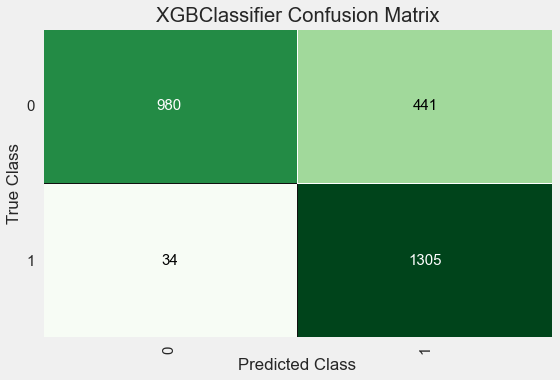

In [153]:
# Matrice de confusion du modèle brute
plot_model(tuned_best_model, plot = 'confusion_matrix')

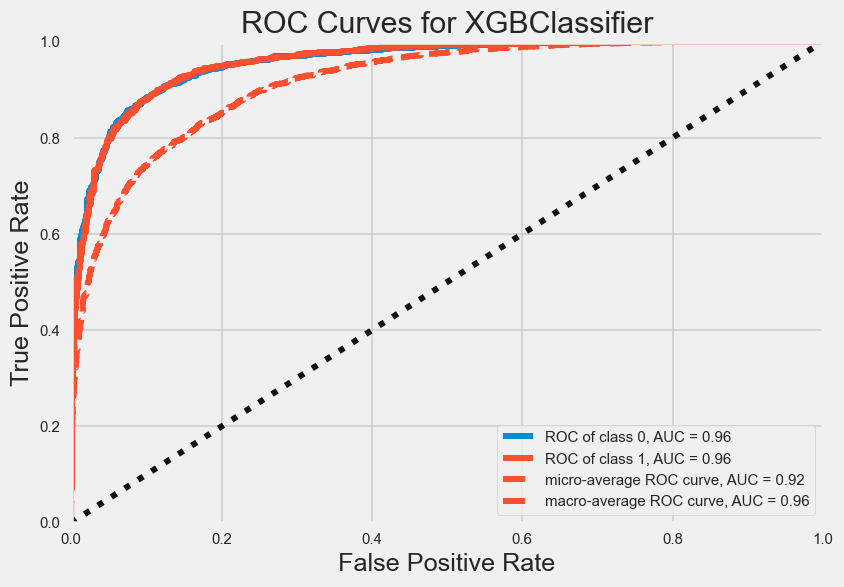

In [154]:
# Courbe ROC de confusion du modèle brute
plot_model(tuned_best_model, plot = 'auc', scale=1.5)

### Tester situation de sur-apprentissage

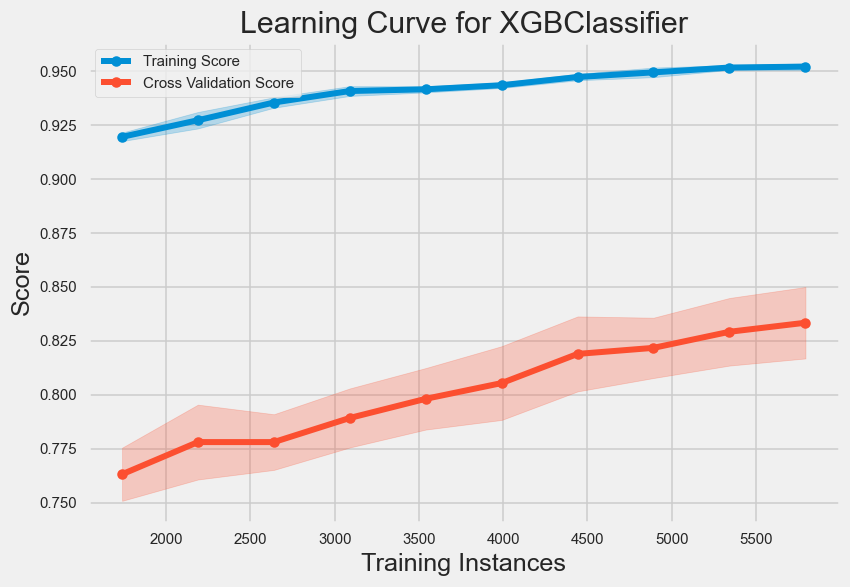

In [155]:
# Vérifier les progressions des scores d'apprentissage et de cross validation sur le jeu d'appentissage
plot_model(tuned_best_model, scale=1.5, plot='learning')   

### Calculer les prédictions 

In [156]:
# Prédire les demandes en défaut et la probabilité de défaut associée (PRED, Probabilité de défaut)
df_traintrain_lgbm_balanced_pred = predict_model(tuned_best_model, data = df_traintrain_lgbm_balanced, raw_score=True)
df_traintrain_lgbm_balanced_pred.rename(columns={'Label':'PRED', 'Score_1.0':'Probabilité de défaut'}, inplace=True) 
df_traintrain_lgbm_balanced_pred['PRED'] = df_traintrain_lgbm_balanced_pred['PRED'].astype(np.float64)
df_traintrain_lgbm_balanced_pred.drop(columns={'Score_0.0'}, inplace=True) 
df_traintrain_lgbm_balanced_pred

AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH_x  DAYS_EMPLOYED  \
0       1.943121     0.869636         1.808028     -1.379931       0.581225   
1      -0.923019    -1.138583        -0.970289      0.512377       0.532540   
2       0.620435     1.315493         0.370127     -0.740378       0.394912   
3       1.653213     0.689244         1.223119     -0.408800       0.743195   
4      -0.985182    -1.059410        -0.909361      0.821957      -4.274617   
...          ...          ...              ...           ...            ...   
9193    2.025069     1.072411         1.959084     -0.540160      -0.640227   
9194    1.661049     0.984857         1.950157      0.991881       0.271782   
9195   -0.712929    -0.688076        -0.713850     -0.637907       0.657429   
9196   -0.455804     0.385824        -0.426419     -1.477073       0.648716   
9197   -0.906740    -0.211699        -0.823866     -0.090213      -0.168184   

      CREDIT_TERM  DAYS_EMPLOYED_PERCENT  \
0       -1.109433               0.403464   
1       -0.314802               0.730890   
2        0.031512               0.328761   
3       -1.083376               0.848921   
4        0.193481              -3.530513   
...           ...                    ...   
9193    -0.613942              -0.951254   
9194    -0.897665               0.270739   
9195    -0.016658               0.711011   
9196     1.108828               0.485475   
9197     2.150431              -0.267408   

      EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  EXT_SOURCE_2 EXT_SOURCE_3^2  \
0                                   1.485760                     0.949412   
1                                  -0.069038                    -0.137432   
2                                  -1.345067                    -1.327735   
3                                   1.619710                     1.667404   
4                                   1.376848                     2.110481   
...                                      ...                          ...   
9193                               -1.341713                    -1.222845   
9194                                0.271606                     0.144603   
9195                                0.725362                     1.183247   
9196                               -1.429605                    -1.016257   
9197                               -0.863461                    -0.923601   

      bureau_DAYS_CREDIT_max  client_installments_AMT_PAYMENT_min_sum  TARGET  \
0                  -0.619114                                -0.334686     0.0   
1                   0.323102                                -0.666139     0.0   
2                   0.078086                                -0.666807     0.0   
3                   0.378878                                -0.473633     0.0   
4                   0.518318                                -0.612038     0.0   
...                      ...                                      ...     ...   
9193                0.666015                                -0.509954     1.0   
9194                0.274054                                 0.985543     1.0   
9195               -1.195052                                -0.408156     1.0   
9196                0.305915                                -0.666040     1.0   
9197                0.623241                                -0.350311     1.0   

      PRED  Probabilité de défaut  
0      0.0                 0.0004  
1      0.0                 0.3035  
2      0.0                 0.2050  
3      0.0                 0.2670  
4      0.0                 0.0170  
...    ...                    ...  
9193   1.0                 0.9944  
9194   1.0                 0.9942  
9195   1.0                 0.9945  
9196   1.0                 0.9953  
9197   0.0                 0.4618  

[9198 rows x 14 columns]

In [157]:
# Calculer recall et antispecificity
[recall, antispecificity, proba] = metrics.roc_curve(df_traintrain_lgbm_balanced_pred['TARGET'], \
                                        df_traintrain_lgbm_balanced_pred['PRED'], pos_label=1)
# Calculer l'AUROC
print("Area Under the ROC curve sur le jeu d'entrainement avec tuned_best_model:", metrics.auc(recall, antispecificity))

Area Under the ROC curve sur le jeu d'entrainement avec tuned_best_model: 0.9148727984344425


###  Dessiner le coût en fonction du seuil de probabilité  

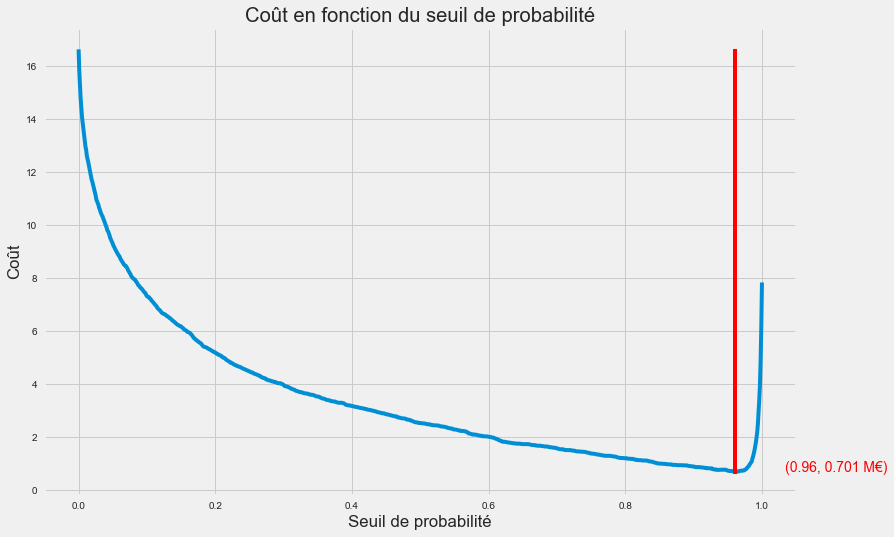

In [158]:
threshold = []
cost=[]

# Passer le montant du crédit en paramètre
kwargs = {"amt" : df_traintrain_balanced_desc['AMT_CREDIT'].values}

for thr in np.linspace(0, 1, 1000):
    
    # Récupération du seuil
    threshold = np.append(threshold, [thr], axis=0)
    
    # Calculer PRED_new en fonction de thr et de Probabilité de défaut
    # Si Probabilité de défaut < thr alors PRED_new = 0 sinon PRED_new = 1
    df_traintrain_lgbm_balanced_pred['PRED_new'] = 1.0
    df_traintrain_lgbm_balanced_pred['PRED_new'] = df_traintrain_lgbm_balanced_pred['PRED_new']\
                    .where((df_traintrain_lgbm_balanced_pred['Probabilité de défaut'] > thr), 0.0)

    
    # Calculer le coût de chaque demande en fonction de PRED_new 
    df_traintrain_lgbm_balanced_pred['Coût'] = fonction_cout_ind(df_traintrain_lgbm_balanced_pred['TARGET'], \
                                                                 df_traintrain_lgbm_balanced_pred['PRED_new'], **kwargs) 
    # Calculer le coût total 
    cost = np.append(cost, [df_traintrain_lgbm_balanced_pred['Coût'].sum()], axis=0)

# Calculer les coordonnées du minimum
threshold_min = threshold[cost.argmin()]
cost_min = cost[cost.argmin()]
cost_max = cost.max()

# Représenter le coût en fonction du seuil de probabilité
plot = plt.figure(figsize=(12, 8))
plt.plot(threshold, cost)
plt.xlabel("Seuil de probabilité")
plt.ylabel("Coût")
plt.title("Coût en fonction du seuil de probabilité")

# Dessiner le minimum
plt.plot([threshold_min, threshold_min], [cost_min*0.9, cost_max], color='red')    
label = "("+str(np.round(threshold_min, 4))+", "+str(np.round(cost_min, 3))+" M€)"
plt.annotate(label, # this is the text
             (threshold_min, cost_min), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(50, 0), # distance from text to points (x,y)
             ha='left', color='red') # horizontal alignment can be left, right or center

plt.show()

In [159]:
# Conserver la courbe de coût pour l'afficher dans l'API 
df_cost = pd.DataFrame(threshold, columns=['Seuil'])
df_cost = pd.merge(df_cost, pd.DataFrame(cost, columns=['Cout']), left_index=True, right_index=True)
df_cost

Seuil       Cout
0    0.000000  16.633491
1    0.001001  15.791438
2    0.002002  15.287737
3    0.003003  14.759028
4    0.004004  14.418993
..        ...        ...
995  0.995996   3.387855
996  0.996997   3.931014
997  0.997998   4.850721
998  0.998999   6.131215
999  1.000000   7.839349

[1000 rows x 2 columns]

In [160]:
# Mettre à jour PRED_new et Coût avec le seuil minimum   
df_traintrain_lgbm_balanced_pred['PRED_new'] = 1.0
df_traintrain_lgbm_balanced_pred['PRED_new'] = df_traintrain_lgbm_balanced_pred['PRED_new']\
                .where((df_traintrain_lgbm_balanced_pred['Probabilité de défaut'] > threshold_min), 0.0)
df_traintrain_lgbm_balanced_pred['Coût'] = fonction_cout_ind(df_traintrain_lgbm_balanced_pred['TARGET'], \
                                                             df_traintrain_lgbm_balanced_pred['PRED_new'], **kwargs) 
df_traintrain_lgbm_balanced_pred

AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH_x  DAYS_EMPLOYED  \
0       1.943121     0.869636         1.808028     -1.379931       0.581225   
1      -0.923019    -1.138583        -0.970289      0.512377       0.532540   
2       0.620435     1.315493         0.370127     -0.740378       0.394912   
3       1.653213     0.689244         1.223119     -0.408800       0.743195   
4      -0.985182    -1.059410        -0.909361      0.821957      -4.274617   
...          ...          ...              ...           ...            ...   
9193    2.025069     1.072411         1.959084     -0.540160      -0.640227   
9194    1.661049     0.984857         1.950157      0.991881       0.271782   
9195   -0.712929    -0.688076        -0.713850     -0.637907       0.657429   
9196   -0.455804     0.385824        -0.426419     -1.477073       0.648716   
9197   -0.906740    -0.211699        -0.823866     -0.090213      -0.168184   

      CREDIT_TERM  DAYS_EMPLOYED_PERCENT  \
0       -1.109433               0.403464   
1       -0.314802               0.730890   
2        0.031512               0.328761   
3       -1.083376               0.848921   
4        0.193481              -3.530513   
...           ...                    ...   
9193    -0.613942              -0.951254   
9194    -0.897665               0.270739   
9195    -0.016658               0.711011   
9196     1.108828               0.485475   
9197     2.150431              -0.267408   

      EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  EXT_SOURCE_2 EXT_SOURCE_3^2  \
0                                   1.485760                     0.949412   
1                                  -0.069038                    -0.137432   
2                                  -1.345067                    -1.327735   
3                                   1.619710                     1.667404   
4                                   1.376848                     2.110481   
...                                      ...                          ...   
9193                               -1.341713                    -1.222845   
9194                                0.271606                     0.144603   
9195                                0.725362                     1.183247   
9196                               -1.429605                    -1.016257   
9197                               -0.863461                    -0.923601   

      bureau_DAYS_CREDIT_max  client_installments_AMT_PAYMENT_min_sum  TARGET  \
0                  -0.619114                                -0.334686     0.0   
1                   0.323102                                -0.666139     0.0   
2                   0.078086                                -0.666807     0.0   
3                   0.378878                                -0.473633     0.0   
4                   0.518318                                -0.612038     0.0   
...                      ...                                      ...     ...   
9193                0.666015                                -0.509954     1.0   
9194                0.274054                                 0.985543     1.0   
9195               -1.195052                                -0.408156     1.0   
9196                0.305915                                -0.666040     1.0   
9197                0.623241                                -0.350311     1.0   

      PRED  Probabilité de défaut  PRED_new      Coût  
0      0.0                 0.0004       0.0  0.000000  
1      0.0                 0.3035       0.0  0.000000  
2      0.0                 0.2050       0.0  0.000000  
3      0.0                 0.2670       0.0  0.000000  
4      0.0                 0.0170       0.0  0.000000  
...    ...                    ...       ...       ...  
9193   1.0                 0.9944       1.0  0.000000  
9194   1.0                 0.9942       1.0  0.000000  
9195   1.0                 0.9945       1.0  0.000000  
9196   1.0                 0.9953       1.0  0.000000  
9197   0.0    

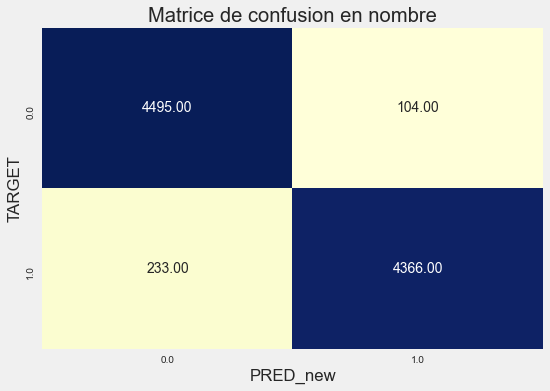

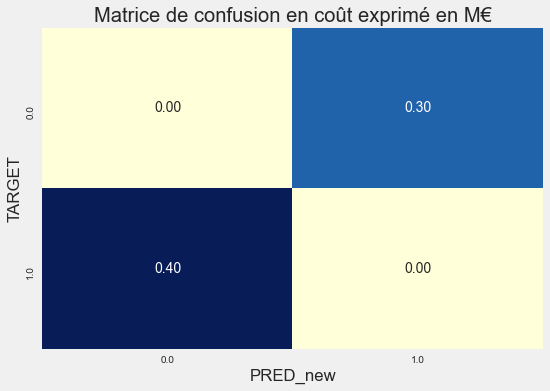

Coût global avec données d'entrainement LGBM= 0.7009500355127662 M€


In [161]:
# Représenter la matrice de confusion en nombre 
contingency_matrix = pd.crosstab(df_traintrain_lgbm_balanced_pred['PRED_new'], df_traintrain_lgbm_balanced_pred['TARGET'])
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion en nombre')
plt.show()

# Représenter la matrice de confusion en coût
cost_matrix = pd.crosstab(index=df_traintrain_lgbm_balanced_pred['PRED_new'], \
                          columns=df_traintrain_lgbm_balanced_pred['TARGET'], \
                          values=df_traintrain_lgbm_balanced_pred['Coût'], aggfunc='sum')
res = sns.heatmap(cost_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion en coût exprimé en M€')
plt.show()

# Calculer le coût global
print("Coût global avec données d'entrainement LGBM= {} M€".format(cost_matrix.sum().sum()))

In [162]:
# Calculer l'AUROC
[recall, antispecificity, proba] = metrics.roc_curve(df_traintrain_lgbm_balanced_pred['TARGET'], \
                                        df_traintrain_lgbm_balanced_pred['PRED_new'], pos_label=1)
print("Area Under the ROC curve sur le jeu d'entrainement avec tuned_best_model et seuil min:", \
      metrics.auc(recall, antispecificity))

# Calculer recall et specificity
recall = metrics.recall_score(df_traintrain_lgbm_balanced_pred['TARGET'], \
                              df_traintrain_lgbm_balanced_pred['PRED_new'], pos_label=1)
tn, fp, fn, tp = confusion_matrix(df_traintrain_lgbm_balanced_pred['TARGET'], \
                                  df_traintrain_lgbm_balanced_pred['PRED_new']).ravel()
specificity = tn / (tn+fp)
print("Sur le jeu d'entrainement, rappel={}, spécificité={}".format(recall, specificity))

Area Under the ROC curve sur le jeu d'entrainement avec tuned_best_model et seuil min: 0.9633616003479017
Sur le jeu d'entrainement, rappel=0.9493368123505109, spécificité=0.9773863883452925


 > rappel: % des mauvaises demandes sont bien refusés    
 > spécificité: % des bonnes demandes sont bien accordées  

## Analyser les résultats du meilleur modèle <a class="anchor" id="sub7_3"></a>

### Vérifier la bonne généralisation avec le jeu de validation

In [163]:
# Passer le montant du crédit en paramètre
kwargs = {"amt" : df_trainval_desc['AMT_CREDIT'].values}

model_var_lgbm = list(df_trainval_lgbm.columns)
df_trainval_lgbm_pred = predict_cout(tuned_best_model, threshold_min, df_trainval_lgbm, **kwargs)
df_trainval_lgbm_pred

AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH_x  DAYS_EMPLOYED  \
0        0.425516     0.246181         0.406684     -0.579974       1.004876   
1       -0.581704    -0.495568        -0.604721      0.386346      -1.253818   
2       -0.781699    -0.584057        -0.848433      1.870541       0.496494   
3        0.938372     0.766555         0.906294     -1.463571       0.887845   
4       -0.685312    -0.513887        -0.702205      0.332267       0.414573   
...           ...          ...              ...           ...            ...   
61498    0.583920     0.040329         0.491983      1.115725       0.282562   
61499    1.754016     0.762208         2.076111      0.401699       0.497899   
61500   -0.892385    -0.003449        -0.848433     -0.611367       0.495090   
61501    0.747780     1.300279         0.979407     -1.070810       0.545647   
61502   -0.840731     0.075104        -0.848433      0.163842       0.488536   

       CREDIT_TERM  DAYS_EMPLOYED_PERCENT  \
0        -0.616988               1.167546   
1         0.040590              -1.052227   
2         0.527516               0.827345   
3        -0.647891               0.929366   
4         0.317469               0.590092   
...            ...                    ...   
61498    -0.911524               0.256647   
61499    -1.087905               0.683154   
61500     2.629780               0.498181   
61501    -0.117205               0.446841   
61502     2.423801               0.639385   

       EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  EXT_SOURCE_2 EXT_SOURCE_3^2  \
0                                   -0.113113                    -0.418300   
1                                    0.454315                    -0.088061   
2                                   -1.487461                    -1.311294   
3                                   -0.346996                    -0.756588   
4                                   -0.363349                    -0.271021   
...                                       ...                          ...   
61498                               -0.244025                    -0.591230   
61499                               -1.084541                    -1.331245   
61500                               -0.501636                    -0.830345   
61501                               -0.987394                    -1.073131   
61502                               -0.535265                    -0.824708   

       bureau_DAYS_CREDIT_max  client_installments_AMT_PAYMENT_min_sum  \
0                    0.518318                                -0.500520   
1                    0.456566                                -0.410434   
2                   -3.820257                                -0.377531   
3                    0.291230                                -0.334686   
4                    0.843014                                -0.708756   
...                       ...                                      ...   
61498               -0.186850                                -0.428506   
61499                0.253382                                -0.678884   
61500                0.368918                                -0.722990   
61501                0.715526                                -0.402854   
61502                0.621902                                -0.491685   

       TARGET  PRED  Probabilité de défaut  PRED_new    Coût  
0         0.0   1.0                 0.7648       0.0  0.0000  
1         0.0   1.0                 0.6767       0.0  0.0000  
2         0.0   0.0                 0.3087       0.0  0.0000  
3         0.0   0.0                 0.2967       0.0  0.0000  
4         0.0   1.0                 0.9171       0.0  0.0000  
...       ...   ...                    ...       ...     ...  
61498     0.0   0.0                 0.0001       0.0  0.0000  
61499     0.0   0.0                 0.3704       0.0  0.0000  
61500     0.0   1.0                 0.9426       0.0  0.0000  
61501     1.0   1.0                 0.7784       

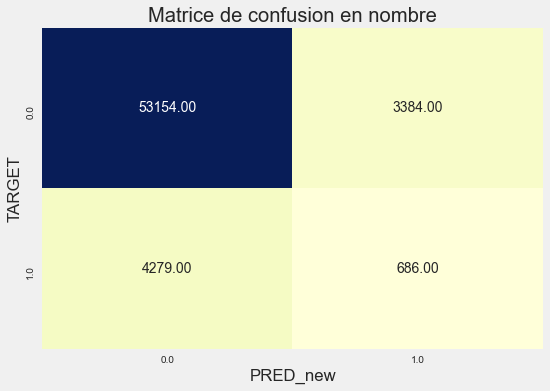

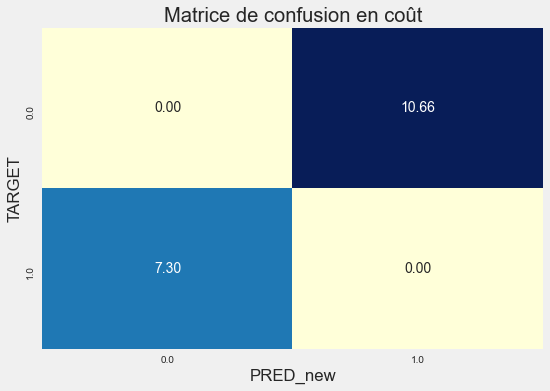

Coût global avec données de validation LGBM= 17.957090988


In [164]:
# Représenter la matrice de confusion en nombre 
contingency_matrix = pd.crosstab(df_trainval_lgbm_pred['PRED_new'], df_trainval_lgbm_pred['TARGET'])
res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion en nombre')
plt.show()

# Représenter la matrice de confusion en coût
cost_matrix = pd.crosstab(index=df_trainval_lgbm_pred['PRED_new'], \
                          columns=df_trainval_lgbm_pred['TARGET'], \
                          values=df_trainval_lgbm_pred['Coût'], aggfunc='sum')
res = sns.heatmap(cost_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion en coût')
plt.show()

# Calculer le coût global
print("Coût global avec données de validation LGBM= {}".format(cost_matrix.sum().sum()))

In [165]:
# Calculer l'AUROC
[recall, antispecificity, proba] = metrics.roc_curve(df_trainval_lgbm_pred['TARGET'], \
                                        df_trainval_lgbm_pred['PRED_new'], pos_label=1)
print("Area Under the ROC curve sur le jeu de validation:", metrics.auc(recall, antispecificity))

# Calculer recall et specificity
recall = metrics.recall_score(df_trainval_lgbm_pred['TARGET'], \
                              df_trainval_lgbm_pred['PRED_new'], pos_label=1)
tn, fp, fn, tp = confusion_matrix(df_trainval_lgbm_pred['TARGET'], \
                                  df_trainval_lgbm_pred['PRED_new']).ravel()
specificity = tn / (tn+fp)
print("Sur le jeu de validation, rappel={}, spécificité={}".format(recall, specificity))

Area Under the ROC curve sur le jeu de validation: 0.5391568101832214
Sur le jeu de validation, rappel=0.13816717019133937, spécificité=0.9401464501751035


### Identifier les variables importantes

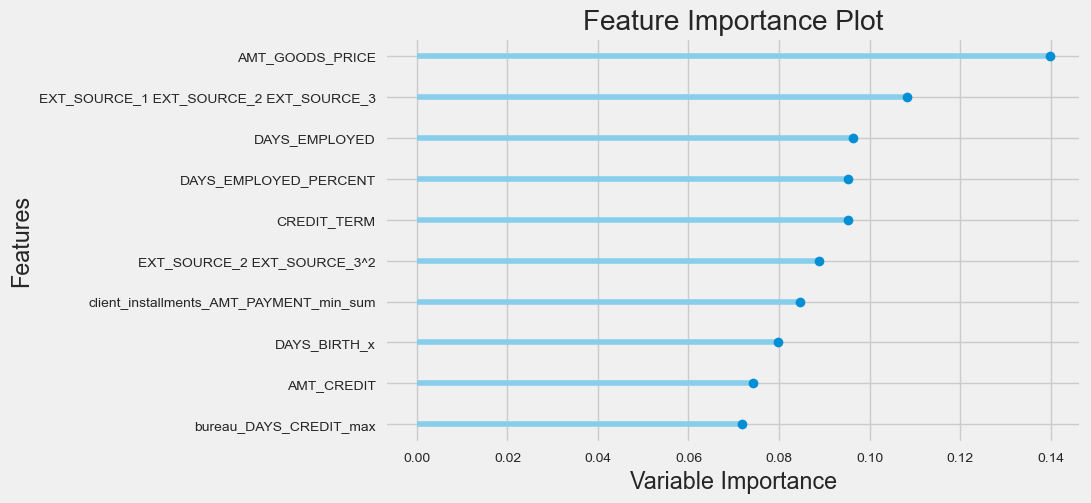

In [166]:
# les features les plus importantes seulement
plot_model(tuned_best_model, plot='feature')

In [167]:
# Récupérer les coefficients d'importance des variables les plus importantes
df_feature_imp = pd.DataFrame({'Feature': get_config('X_train').columns, \
               'Value' : abs(tuned_best_model.feature_importances_)}).sort_values(by='Value', ascending=False)
df_feature_imp.rename(columns={"Value": "Weight"}, inplace=True)
df_feature_imp

Feature    Weight
2                           AMT_GOODS_PRICE  0.139789
7    EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  0.108195
4                             DAYS_EMPLOYED  0.096356
6                     DAYS_EMPLOYED_PERCENT  0.095312
5                               CREDIT_TERM  0.095304
8               EXT_SOURCE_2 EXT_SOURCE_3^2  0.088821
10  client_installments_AMT_PAYMENT_min_sum  0.084741
3                              DAYS_BIRTH_x  0.079734
0                                AMT_CREDIT  0.074254
9                    bureau_DAYS_CREDIT_max  0.071792
1                               AMT_ANNUITY  0.065701

### Sauver le modèle

In [168]:
tuned_best_model_lgbm = tuned_best_model
df_feature_imp_lgbm = df_feature_imp
df_cost_lgbm = df_cost

# Préparer les données pour le tableau de bord <a class="anchor" id="chapter9"></a> 

## Récupérer les éléments du meilleur modèle   <a class="anchor" id="sub9_0"></a> 

In [169]:
# Récupérer le meilleur modèle et son seuil
model_final = tuned_best_model_lgbm
# Récupérer les coefficients d'importance des variables les plus importantes 
df_feature_imp_final = df_feature_imp_lgbm
# Récupérer la courbe de coût
df_cost_final = df_cost_lgbm
threshold_min_final = df_cost_final['Seuil'].iloc[df_cost_final['Cout'].idxmin()]
# Récupérer la liste des variables
model_var_final = model_var_lgbm 

In [170]:
model_var_final

['AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH_x',
 'DAYS_EMPLOYED',
 'CREDIT_TERM',
 'DAYS_EMPLOYED_PERCENT',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'bureau_DAYS_CREDIT_max',
 'client_installments_AMT_PAYMENT_min_sum',
 'TARGET']

### Libérer de l'espace mémoire

In [171]:
del bureau, bureau_balance, previous, installments, cash, credit, sample, description
del app_train_pca, app_test_pca
del app_train_lgbm, app_test_lgbm

del df_xtraintrain_pca_balanced, df_ytraintrain_pca_balanced, \
        df_traintrain_pca_balanced, df_traintrain_pca_balanced_pred
del df_xtraintrain_lgbm_balanced, df_ytraintrain_lgbm_balanced, \
        df_traintrain_lgbm_balanced, df_traintrain_lgbm_balanced_pred
del df_xtrainval_pca, df_ytrainval_pca
del df_xtrainval_lgbm, df_ytrainval_lgbm

del Xtrain_pca, Xtest_pca
del Xtrain_lgbm, Xtest_lgbm
del Xtraintrain_pca, Xtrainval_pca, ytraintrain_pca, ytrainval_pca
del Xtraintrain_lgbm, Xtrainval_lgbm, ytraintrain_lgbm, ytrainval_lgbm

del age_data, ext_data
del poly_features, poly_features_test, poly_transformer
del target
del train_missing_values, test_missing_values
del Xtrain, ytrain
del df_eboulis

gc.collect()

0

## Préparer les données de test   <a class="anchor" id="sub9_1"></a> 
Se limiter aux variables importantes  
Se limiter nombre d'individus

In [172]:
df_dash_desc = app_test_desc[model_var_final[0:-1]]
df_dash_desc.reset_index(inplace=True)
print("Dimensions df_dash_desc données brutes et prédiction: ", df_dash_desc.shape)

df_dash = app_test[model_var_final[0:-1]]
df_dash.reset_index(inplace=True)
print("Dimensions df_dash : ", df_dash.shape)

Dimensions df_dash_desc données brutes et prédiction:  (48744, 12)
Dimensions df_dash :  (48744, 12)


In [173]:
# Initialiser les positions
ind_sample = np.arange(len(df_dash_desc))

# Permuter aléatoirement les positions
ind_sample = shuffle(ind_sample, random_state=42)

# Prendre les TargetSize premières positions
TargetSize = 5000
ind_sample = ind_sample[:TargetSize]
ind_sample

array([15071, 10157, 36313, ..., 11475, 28034, 22528])

In [174]:
del app_train, app_test, df_trainval_pca, df_trainval_lgbm
gc.collect()

45

## Estimer les probabilités de défaut et les décisions <a class="anchor" id="sub9_2"></a> 

In [175]:
# Mettre à jour de la prédiction et de la probabilité de défaut
df_dash_pred = predict_model(model_final, data = df_dash.iloc[ind_sample], raw_score=True)
df_dash_pred.rename(columns={'Label':'PRED', 'Score_1.0':'Probabilité de défaut'}, inplace=True) 
df_dash_pred['PRED'] = df_dash_pred['PRED'].astype(np.float64)
df_dash_pred.drop(columns={'Score_0.0'}, inplace=True) 
df_dash_pred

index  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH_x  \
15071  15071    0.925458     0.432561         0.710948      1.091133   
10157  10157   -0.603351    -0.647163        -0.705714     -0.874721   
36313  36313   -0.483842     0.391530        -0.438420      0.215006   
6017    6017    0.254953     0.115276         0.189723      0.197437   
26319  26319   -0.182654    -0.402666        -0.037477      0.060586   
...      ...         ...          ...              ...           ...   
18137  18137    0.100196     0.045018        -0.144395      1.555319   
22477  22477   -0.337164    -0.574657        -0.398325     -0.644246   
11475  11475   -0.860006    -0.830396        -0.772538      0.322037   
28034  28034   -1.106316    -1.470868        -1.039833      1.323688   
22528  22528   -0.798429    -1.238735        -0.705714      1.142684   

       DAYS_EMPLOYED  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  \
15071       0.568989    -0.981561              -0.463960   
10157       0.275028    -0.093008              -0.239694   
36313      -1.216731     1.563011               1.381794   
6017       -0.206000    -0.625164               0.210092   
26319      -1.658150    -0.633784               1.755095   
...              ...          ...                    ...   
18137       0.315590    -0.494575               0.190167   
22477       0.907331    -0.620465              -1.112224   
11475       1.004204     0.530399              -1.172012   
28034       0.275028    -0.587354              -0.239694   
22528      -0.349640    -0.977526               0.992583   

       EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  EXT_SOURCE_2 EXT_SOURCE_3^2  \
15071                                1.444832                     0.652396   
10157                                0.592264                     0.520545   
36313                                1.959987                     0.844849   
6017                                 0.099418                    -0.196814   
26319                               -0.551383                    -0.125581   
...                                       ...                          ...   
18137                               -1.019391                    -0.857263   
22477                               -1.020105                    -0.318373   
11475                               -0.110443                    -0.374825   
28034                               -1.457990                    -1.117841   
22528                               -0.418750                    -0.382125   

       bureau_DAYS_CREDIT_max  client_installments_AMT_PAYMENT_min_sum  PRED  \
15071                0.317348                                 0.138350   0.0   
10157                0.986764                                -0.207596   0.0   
36313               -1.168377                                 0.687226   0.0   
6017                 0.420174                                 0.721905   1.0   
26319                0.317348                                -0.207544   0.0   
...                       ...                                      ...   ...   
18137                0.329939                                -0.724585   0.0   
22477               -0.089757                                -0.182121   1.0   
11475                0.361417                                -0.729256   1.0   
28034                0.317348                                -0.526155   1.0   
22528                0.516704                                 0.245211   0.0   

       Probabilité de défaut  
15071                 0.3799  
10157                 0.4384  
36313                 0.0699  
6017                  0.9867  
26319                 0.0385  
...                      ...  
18137                 0.2435  
22477                 0.9887  
11475                 0.9981  
28034                 0.5089  
22528                 0.0859  

[5000 rows x 14 columns]

In [176]:
# Ajout de 'Probabilité de défaut', 'PRED_new' dans df_dash_desc 
df_dash_desc = pd.merge(df_dash_desc.iloc[ind_sample], df_dash_pred[['Probabilité de défaut', 'PRED']], \
                        left_index=True, right_index=True)
df_dash_desc

index  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH_x  \
15071  15071    854896.5      36351.0         702000.0        -11348   
10157  10157    296280.0      19062.0         225000.0        -19852   
36313  36313    339948.0      35694.0         315000.0        -15138   
6017    6017    609898.5      31270.5         526500.0        -15214   
26319  26319    450000.0      22977.0         450000.0        -15806   
...      ...         ...          ...              ...           ...   
18137  18137    553351.5      30145.5         414000.0         -9340   
22477  22477    393543.0      20223.0         328500.0        -18855   
11475  11475    202500.0      16128.0         202500.0        -14675   
28034  28034    112500.0       5872.5         112500.0        -10342   
22528  22528    225000.0       9589.5         225000.0        -11125   

       DAYS_EMPLOYED  CREDIT_TERM  DAYS_EMPLOYED_PERCENT  \
15071        -1149.0     0.042521               0.101251   
10157        -1765.0     0.064338               0.128206   
36313        -4891.0     0.104998               0.323094   
6017         -2773.0     0.051272               0.182266   
26319        -5816.0     0.051060               0.367962   
...              ...          ...                    ...   
18137        -1680.0     0.054478               0.179872   
22477         -440.0     0.051387               0.023336   
11475         -237.0     0.079644               0.016150   
28034        -1765.0     0.052200               0.128206   
22528        -3074.0     0.042620               0.276315   

       EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3  EXT_SOURCE_2 EXT_SOURCE_3^2  \
15071                                0.263217                     0.221163   
10157                                0.188710                     0.206965   
36313                                0.308238                     0.241886   
6017                                 0.145639                     0.129720   
26319                                0.088764                     0.137390   
...                                       ...                          ...   
18137                                0.047864                     0.058603   
22477                                0.047801                     0.116631   
11475                                0.127299                     0.110552   
28034                                0.009534                     0.030544   
22528                                0.100355                     0.109766   

       bureau_DAYS_CREDIT_max  client_installments_AMT_PAYMENT_min_sum  \
15071                  -327.0                            379275.750000   
10157                    -8.0                            228809.609375   
36313                 -1035.0                            618004.312500   
6017                   -278.0                            633088.000000   
26319                  -327.0                            228832.156250   
...                       ...                                      ...   
18137                  -321.0                              3950.100098   
22477                  -521.0                            239889.968750   
11475                  -306.0                              1918.260010   
28034                  -327.0                             90255.062500   
22528                  -232.0                            425753.906250   

       Probabilité de défaut  PRED  
15071                 0.3799   0.0  
10157                 0.4384   0.0  
36313                 0.0699   0.0  
6017                  0.9867   1.0  
26319                 0.0385   0.0  
...                      ...   ...  
18137                 0.2435   0.0  
22477                 0.9887   1.0  
11475                 0.9981   1.0  
28034                 0.5089   1.0  
22528                 0.0859   0.0  

[5000 rows x 14 columns]

## Sauver les données destinées au tableau de bord <a class="anchor" id="sub9_3"></a> 

In [177]:
print("Dimensions df_dash_pred données descriptives: ", df_dash_desc.shape)
print("Dimensions df_dash_pred données normalisées et prédiction: ", df_dash_pred.shape)

Dimensions df_dash_pred données descriptives:  (5000, 14)
Dimensions df_dash_pred données normalisées et prédiction:  (5000, 14)


In [178]:
compression_opts = dict(method='zip', archive_name='PAD_04_dash_desc.csv')  
df_dash_desc.to_csv(path_or_buf='PAD_04_dash_desc.zip', index = False, compression=compression_opts)
compression_opts = dict(method='zip', archive_name='PAD_04_dash_pred.csv')  
df_dash_pred.to_csv('PAD_04_dash_pred.zip', index = False, compression=compression_opts)
df_feature_imp_final.to_csv('PAD_04_feature.csv', index = False)
df_cost_final.to_csv('PAD_04_cost.csv', index = False)